# 1. load drive and install and load dependencies

In [ ]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pycaret

     |████████████████████████████████| 266 kB 1.9 MB/s 
     |████████████████████████████████| 271 kB 34.8 MB/s 
     |████████████████████████████████| 113 kB 57.7 MB/s 
     |████████████████████████████████| 167 kB 54.5 MB/s 
     |████████████████████████████████| 261 kB 51.0 MB/s 
     |████████████████████████████████| 1.3 MB 62.5 MB/s 
     |████████████████████████████████| 1.7 MB 62.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.9 MB 84 kB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 6.8 MB 20.2 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 
     |████████████████████████████████| 2.0 MB 57.5 MB/s 
     |████████████████████████████████| 62 kB 676 kB/s 
     |████████████████████████████████| 596 kB 56.1 MB/s 
     |█████████████████████

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

# 2. import data

In [ ]:
!unzip '/content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_30.zip'

Archive:  /content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_30.zip
  inflating: subset_30.csv           


In [ ]:
df = pd.read_csv('subset_30.csv', index_col=0)
df.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3721462_TTAACTCGTGGTCCGT,-0.107822,1.051505,2.883262,2.432532,-0.109245,-0.396519,-0.311899,-0.228958,-0.374381,-0.314901,-0.123083,-0.478353,-0.121983,-0.410996,-0.317847,1.079731,-0.391834,2.974507,-0.301609,-0.098347,-0.279872,-0.395123,-0.191592,-0.141523,2.747149,-0.286109,-0.258971,-0.405238,2.290373,-0.221732,-0.336877,-0.186678,-0.190720,-0.397566,-0.121845,-0.290821,-0.388675,-0.311518,-0.330698,-0.205876,...,-0.378217,-0.303091,1.793907,-0.161401,4.651855,-0.297566,-0.692460,-0.375107,-0.377831,-0.095107,-0.533894,-0.263100,-0.352260,-1.154305,-0.382664,-0.426481,-0.379495,-0.342781,-0.212108,0.508784,-0.968659,-0.167294,-0.175711,-0.158574,-0.314983,-0.196282,-0.375283,-1.761688,-0.432253,0.329213,0.979543,0.790286,0.796424,0.370406,0.648496,1.069004,CD4 regulatory T-cell (unspecified),T-cell,CD4 T-cell,CD4 regulatory T-cell (unspecified)
ERS3566166_TTAGGACGTATCGCAT,-0.063655,1.507653,2.670236,-0.142561,-0.135437,-0.394918,3.389801,-0.269016,2.823940,-0.359724,-0.094244,-0.434981,-0.189475,-0.235168,-0.368243,-0.923308,-0.340171,-0.306440,-0.214260,-0.094144,-0.236329,-0.306553,-0.231763,-0.188861,-0.591062,-0.322846,-0.314922,-0.458404,2.475220,-0.198593,-0.366953,-0.152740,-0.180766,-0.427092,-0.135466,-0.284995,-0.375764,-0.263782,-0.403794,-0.931781,...,-0.395308,-0.210619,0.566931,-0.157472,-0.211639,-0.283868,-0.457814,-0.286747,-0.342757,-0.138169,-0.573991,-0.310218,-0.326078,-1.110088,-0.238186,-0.205472,2.835677,-0.192411,-0.171109,0.858273,2.118469,-0.197778,-0.206334,-0.164395,-0.345497,-0.283872,-0.360782,-0.247293,0.725249,-0.654162,-0.337532,-0.868864,0.054169,0.341223,-1.366824,-1.693424,CD8 exhausted cytotoxic T-cell (unspecified),T-cell,CD8 T-cell,CD8 exhausted cytotoxic T-cell (unspecified)
GSM4143657_GTATTCTGTGGCGAAT,-0.113647,0.480302,-0.515310,-0.505588,-0.108071,1.590379,-0.313657,-0.220113,-0.364669,2.120046,6.166434,1.260205,-0.260681,-0.442320,-0.305378,0.980242,-0.375075,-0.338135,-0.378109,-0.098390,-0.273910,-0.412770,-0.195258,-0.143248,-0.767891,2.455667,-0.260026,-0.404972,1.378897,-0.238459,-0.356384,-0.180861,-0.196920,-0.402247,-0.125187,-0.321445,1.539020,-0.322930,-0.362763,0.687239,...,-0.406624,-0.327391,0.134323,-0.162440,-0.213711,-0.451615,-0.799243,-0.395797,-0.404153,-0.150954,-0.551123,-0.260729,-0.372876,-0.166995,-0.382728,-0.475363,-0.420067,-0.360509,-0.235100,-0.072508,0.625717,-0.157375,-0.179278,-0.167442,-0.312845,-0.214009,-0.357135,0.161567,0.077252,-0.491519,0.435404,0.563995,0.375063,1.105832,0.026785,0.233371,CD4 helper T-cell (unspecified),T-cell,CD4 T-cell,CD4 helper T-cell (unspecified)
GSM3511757_TTGACTTCAAACAACA,-0.117449,-0.672047,-0.491876,-0.484852,-0.100217,-0.398654,-0.333986,-0.231560,-0.375638,-0.296662,-0.124381,-0.493961,-0.168745,-0.457732,-0.306684,1.827102,-0.403985,-0.350837,-0.330297,-0.108919,-0.304182,-0.401522,-0.176835,-0.128035,-0.753513,-0.281455,-0.258681,-0.395121,-0.404980,-0.216367,-0.334333,-0.191253,-0.192640,-0.383314,-0.128038,3.274703,-0.399176,-0.309047,-0.330898,-0.375920,...,-0.346198,-0.305871,0.030387,-0.178059,-0.212737,-0.253249,0.964312,2.300342,-0.369430,-0.109067,3.033242,-0.252673,-0.293199,0.298238,-0.394649,-0.472961,-0.401968,-0.380347,-0.215548,0.436071,-0.975147,-0.162729,-0.181099,-0.155006,-0.311501,-0.193034,2.493191,1.230001,0.532403,0.197154,0.532417,0.726922,1.634403,-1.353829,0.354251,-0.382876

In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df['cell_type'].value_counts()}), pd.DataFrame({'percentage': df['cell_type'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
T-cell,24926,0.765611
B-cell,2158,0.066284
macrophage,1823,0.055994
plasma cell,885,0.027183
killer cell,756,0.023221
monocyte,655,0.020119
dendritic cell,597,0.018337
lymphocyte,271,0.008324
granulocyte,243,0.007464
mast cell,147,0.004515


## add new cell type lables for T cell hierarchical models

In [ ]:
category_dict_2 = {
   'CD4 naive T-cell': 'CD4 T-cell',
   'CD4 regulatory T-cell (unspecified)': 'CD4 T-cell',
   'CD8 effector memory T-cell': 'CD8 T-cell',
   'CD4 helper T-cell (unspecified)': 'CD4 T-cell',
   'CD8 memory T-cell (unspecified)': 'CD8 T-cell',
   'CD4 follicular helper T-cell': 'CD4 T-cell',
   'CD8 T-cell (unspecified)': 'CD8 T-cell',
   'CD8 resident memory T-cell': 'CD8 T-cell',
   'B-cell (unspecified)': 'B-cell',
   'CD8 activated T-cell (unspecified)': 'CD8 T-cell',
   'macrophage': 'macrophage',
   'plasma cell': 'plasma cell',
   'CD8 exhausted T-cell (unspecified)': 'CD8 T-cell',
   'natural killer cell': 'killer cell',
   'CD8 exhausted resident memory T-cell': 'CD8 T-cell',
   'NK T-cell (unspecified)': 'other T-cell',
   'Th17 T-cell': 'other T-cell',
   'M2 macrophage': 'macrophage',
   'CD8 cytotoxic T-cell (unspecified)': 'CD8 T-cell',
   'classical monocyte': 'monocyte',
   'CD4 T-cell (unspecified)': 'CD4 T-cell',
   'GC-dependent memory B-cell': 'B-cell',
   'T-cell (unspecified)': 'other T-cell',
   'non-classical monocyte': 'monocyte',
   'lymphocyte': 'lymphocyte',
   'naive B-cell': 'B-cell',
   'granulocyte': 'granulocyte',
   'conventional dendritic cell': 'dendritic cell',
   'CD8 exhausted cytotoxic T-cell (unspecified)': 'CD8 T-cell',
   'mast cell': 'mast cell',
   'conventional dendritic cell 2': 'dendritic cell',
   'plasmacytoid dendritic cell': 'dendritic cell',
   'dendritic cell': 'dendritic cell',
   'CD8 naive T-cell': 'CD8 T-cell',
   'leukocyte': 'leukocyte',
   'M1 macrophage': 'macrophage',
   'perivascular M2 macrophage': 'macrophage',
   'myeloid cell (unspecified)': 'myeloid cell',
   'CD4 central memory T-cell': 'CD4 T-cell',
   'GC-independent memory B-cell': 'B-cell',
   'CD8 central memory T-cell': 'CD8 T-cell',
   'conventional dendritic cell 1': 'dendritic cell',
   'gd T-cell (unspecified)': 'other T-cell'
}

In [ ]:
data['cell_type_2'] = data['cell_state'].apply(lambda cell: category_dict_2[cell])
data.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3148575_AAACCTGAGGTCGGAT,-0.120063,-0.666726,-0.496918,-0.479612,-0.099574,-0.387737,-0.331833,-0.229907,-0.339842,-0.270848,-0.107915,-0.511503,-0.277814,-0.462453,-0.301821,-0.231361,-0.385800,1.894113,-0.409136,-0.109023,2.349367,-0.435257,-0.191539,-0.136378,-0.744321,2.390128,-0.294596,-0.378270,-0.488496,-0.214503,-0.341572,-0.187895,-0.198950,-0.382059,-0.128542,-0.316360,-0.427453,-0.296122,-0.351139,0.940758,...,-0.146983,-0.368192,-0.313880,-0.352356,-0.183203,-0.200532,-0.435039,-0.778602,-0.322719,-0.392403,-0.144354,1.709019,-0.244584,-0.330453,-0.207097,-0.389824,-0.495193,-0.413506,-0.380598,-0.215174,0.413374,0.562191,-0.152656,-0.198916,-0.165524,-0.311806,-0.194028,-0.357682,0.758289,0.298942,-0.276559,0.844270,-0.499903,0.963173,-1.022702,0.769905,0.832802,CD8 T-cell (unspecified),T-cell,CD8 T-cell
GSM3148575_AAACCTGCAACACCCG,-0.078043,-0.358352,-0.240397,-0.199843,-0.128613,-0.371469,-0.267228,-0.253885,-0.292382,-0.313821,-0.088790,-0.466089,-0.226714,-0.270607,-0.353075,0.574824,-0.335640,-0.314195,-0.323180,-0.090300,-0.250339,-0.391124,-0.246797,-0.189673,-0.616370,-0.316149,-0.356780,1.552249,-0.499215,-0.194878,-0.352990,-0.163568,-0.190939,-0.415853,-0.124281,-0.304426,-0.387812,-0.252874,-0.383583,0.478811,...,-0.175378,-0.423910,3.649650,0.573384,-0.158770,-0.188699,2.267675,-0.512170,-0.245922,3.651268,-0.132690,1.799477,-0.281949,-0.423601,-1.135320,-0.286250,-0.279708,1.809676,-0.224231,-0.168162,0.632239,0.123286,-0.175944,-0.220324,-0.176385,2.226596,-0.234638,-0.340674,0.107710,-0.300499,-0.697762,-0.948415,-0.213541,-0.709115,-0.041497,-0.356811,-0.065298,CD4 naive T-cell,T-cell,CD4 T-cell
GSM3148575_AAACCTGCACCCATGG,-0.062416,-0.195464,-0.065144,-0.042499,-0.135852,-0.351616,-0.248396,-0.270842,-0.268271,-0.325609,-0.101256,-0.445847,-0.054851,-0.181723,-0.380540,0.745766,-0.340088,-0.296601,-0.241316,-0.085254,-0.250838,-0.386196,-0.265224,-0.204572,1.161881,-0.348388,-0.398905,-0.398163,-0.419860,-0.160300,-0.324923,-0.167410,-0.184236,-0.413217,-0.116076,-0.267485,2.620898,-0.213646,-0.346287,0.473759,...,-0.161681,-0.407552,-0.199226,0.747376,-0.154697,-0.173045,-0.448623,-0.300369,-0.162582,-0.359982,-0.056778,-0.593834,-0.284930,-0.450226,-0.950650,-0.266962,-0.173080,-0.193029,-0.163202,-0.117656,-0.828857,0.615416,-0.188198,-0.232735,6.823150,-0.344204,-0.206602,-0.350901,-1.130293,-1.156253,-0.963172,-0.502495,-1.301666,-0.408829,-0.945157,-0.162975,-0.711097,CD8 activated T-cell (unspecified),T-cell,CD8 T-cell
GSM3148575_AAACCTGCAGATGGGT,-0.082079,1.060037,-0.191346,-0.169694,-0.122829,2.005691,-0.276818,-0.259534,-0.277136,-0.297223,-0.101166,1.608985,-0.140124,-0.271896,-0.354905,0.266322,-0.353312,-0.320826,-0.314254,-0.094236,-0.274962,-0.415112,-0.245446,-0.184044,0.767068,-0.328530,-0.382333,-0.381429,-0.453147,-0.170926,-0.326742,-0.175238,-0.190458,-0.398930,-0.119770,-0.284986,-0.348206,-0.230224,-0.346436,0.211194,...,-0.165846,-0.392569,-0.233672,0.831479,-0.168126,3.846999,-0.479853,1.033201,-0.187547,-0.372761,-0.085260,1.248135,-0.266786,-0.417092,-1.064433,-0.307412,1.567685,-0.260816,2.432520,-0.142164,1.474821,0.259275,-0.174021,4.692780,-0.172141,-0.333820,-0.195588,-0.349128,0.346556,-0.558187,-0.403170,-0.261556,-1.011853,0.050656,-0.792443,0.404270,0.123457,CD8 activated T-cell (unspecified),T-cell,CD8 T-cell
GSM3148575_AAACCTGGTAGCACGA,-0.096117,1.80466

# 3. Predict 12 Classes

## split data

In [ ]:
X_test = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y_test = df['cell_type']

## predict subset_30.csv

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# load model
import joblib
filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_12classes_unbalanced.sav'
lr = joblib.load(filename)
# result = clf.score(X_test, y_test)
# print(result)

In [ ]:
# Prediction on test set
y_pred_12classes = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred_12classes) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred_12classes, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred_12classes, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 weighted of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  94.99
F1 weighted of logistic regression model :  94.3
F1 macro of logistic regression model :  63.53


In [ ]:
y_pred_12classes

array(['T-cell', 'T-cell', 'T-cell', ..., 'T-cell', 'T-cell', 'T-cell'],
      dtype=object)

In [ ]:
report = classification_report(y_test, y_pred_12classes)
print(report)

                precision    recall  f1-score   support

        B-cell       0.98      0.98      0.98      2158
        T-cell       0.97      0.99      0.98     24926
dendritic cell       0.87      0.79      0.83       597
   granulocyte       0.51      0.19      0.28       243
   killer cell       0.81      0.49      0.61       756
     leukocyte       0.53      0.13      0.21        68
    lymphocyte       0.60      0.11      0.18       271
    macrophage       0.81      0.91      0.86      1823
     mast cell       0.99      0.91      0.95       147
      monocyte       0.81      0.76      0.78       655
  myeloid cell       0.00      0.00      0.00        28
   plasma cell       0.95      0.97      0.96       885

      accuracy                           0.95     32557
     macro avg       0.74      0.60      0.64     32557
  weighted avg       0.94      0.95      0.94     32557



In [ ]:
cm = confusion_matrix(y_test, y_pred_12classes)
cm

array([[ 2113,    29,     1,     0,     0,     4,     0,     0,     0,
            0,     0,    11],
       [   19, 24731,     2,     3,    87,     1,    18,    41,     0,
            0,     0,    24],
       [    4,    29,   470,     8,     0,     0,     0,    83,     0,
            2,     1,     0],
       [    0,     3,    10,    47,     0,     0,     0,    94,     0,
           89,     0,     0],
       [    1,   382,     1,     0,   371,     0,     0,     1,     0,
            0,     0,     0],
       [   12,    32,     1,     0,     2,     9,     0,    12,     0,
            0,     0,     0],
       [    0,   242,     0,     0,     0,     0,    29,     0,     0,
            0,     0,     0],
       [    2,    54,    51,    16,     0,     0,     0,  1666,     1,
           27,     1,     5],
       [    0,     8,     0,     0,     0,     0,     0,     4,   134,
            0,     0,     1],
       [    0,     8,     2,    17,     0,     0,     0,   130,     0,
          498,     0

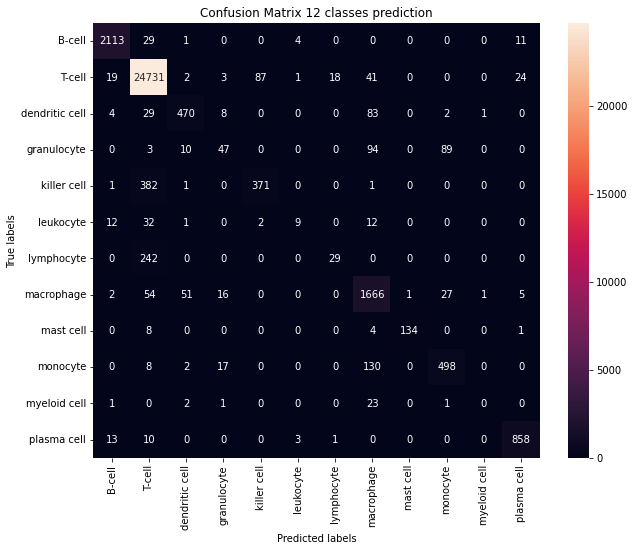

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_test)); ax.yaxis.set_ticklabels(np.unique(y_test));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix 12 classes prediction'); 
plt.show()

# 4. Add Predicted Labels to DF 
needed to be able to split dataset for next steps

In [ ]:
# add predicted labels to df
df['12classes pred'] = y_pred_12classes
df.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3,12classes pred
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3721462_TTAACTCGTGGTCCGT,-0.107822,1.051505,2.883262,2.432532,-0.109245,-0.396519,-0.311899,-0.228958,-0.374381,-0.314901,-0.123083,-0.478353,-0.121983,-0.410996,-0.317847,1.079731,-0.391834,2.974507,-0.301609,-0.098347,-0.279872,-0.395123,-0.191592,-0.141523,2.747149,-0.286109,-0.258971,-0.405238,2.290373,-0.221732,-0.336877,-0.186678,-0.190720,-0.397566,-0.121845,-0.290821,-0.388675,-0.311518,-0.330698,-0.205876,...,-0.303091,1.793907,-0.161401,4.651855,-0.297566,-0.692460,-0.375107,-0.377831,-0.095107,-0.533894,-0.263100,-0.352260,-1.154305,-0.382664,-0.426481,-0.379495,-0.342781,-0.212108,0.508784,-0.968659,-0.167294,-0.175711,-0.158574,-0.314983,-0.196282,-0.375283,-1.761688,-0.432253,0.329213,0.979543,0.790286,0.796424,0.370406,0.648496,1.069004,CD4 regulatory T-cell (unspecified),T-cell,CD4 T-cell,CD4 regulatory T-cell (unspecified),T-cell
ERS3566166_TTAGGACGTATCGCAT,-0.063655,1.507653,2.670236,-0.142561,-0.135437,-0.394918,3.389801,-0.269016,2.823940,-0.359724,-0.094244,-0.434981,-0.189475,-0.235168,-0.368243,-0.923308,-0.340171,-0.306440,-0.214260,-0.094144,-0.236329,-0.306553,-0.231763,-0.188861,-0.591062,-0.322846,-0.314922,-0.458404,2.475220,-0.198593,-0.366953,-0.152740,-0.180766,-0.427092,-0.135466,-0.284995,-0.375764,-0.263782,-0.403794,-0.931781,...,-0.210619,0.566931,-0.157472,-0.211639,-0.283868,-0.457814,-0.286747,-0.342757,-0.138169,-0.573991,-0.310218,-0.326078,-1.110088,-0.238186,-0.205472,2.835677,-0.192411,-0.171109,0.858273,2.118469,-0.197778,-0.206334,-0.164395,-0.345497,-0.283872,-0.360782,-0.247293,0.725249,-0.654162,-0.337532,-0.868864,0.054169,0.341223,-1.366824,-1.693424,CD8 exhausted cytotoxic T-cell (unspecified),T-cell,CD8 T-cell,CD8 exhausted cytotoxic T-cell (unspecified),T-cell
GSM4143657_GTATTCTGTGGCGAAT,-0.113647,0.480302,-0.515310,-0.505588,-0.108071,1.590379,-0.313657,-0.220113,-0.364669,2.120046,6.166434,1.260205,-0.260681,-0.442320,-0.305378,0.980242,-0.375075,-0.338135,-0.378109,-0.098390,-0.273910,-0.412770,-0.195258,-0.143248,-0.767891,2.455667,-0.260026,-0.404972,1.378897,-0.238459,-0.356384,-0.180861,-0.196920,-0.402247,-0.125187,-0.321445,1.539020,-0.322930,-0.362763,0.687239,...,-0.327391,0.134323,-0.162440,-0.213711,-0.451615,-0.799243,-0.395797,-0.404153,-0.150954,-0.551123,-0.260729,-0.372876,-0.166995,-0.382728,-0.475363,-0.420067,-0.360509,-0.235100,-0.072508,0.625717,-0.157375,-0.179278,-0.167442,-0.312845,-0.214009,-0.357135,0.161567,0.077252,-0.491519,0.435404,0.563995,0.375063,1.105832,0.026785,0.233371,CD4 helper T-cell (unspecified),T-cell,CD4 T-cell,CD4 helper T-cell (unspecified),T-cell
GSM3511757_TTGACTTCAAACAACA,-0.117449,-0.672047,-0.491876,-0.484852,-0.100217,-0.398654,-0.333986,-0.231560,-0.375638,-0.296662,-0.124381,-0.493961,-0.168745,-0.457732,-0.306684,1.827102,-0.403985,-0.350837,-0.330297,-0.108919,-0.304182,-0.401522,-0.176835,-0.128035,-0.753513,-0.281455,-0.258681,-0.395121,-0.404980,-0.216367,-0.334333,-0.191253,-0.192640,-0.383314,-0.128038,3.274703,-0.399176,-0.309047,-0.330898,-0.375920,...,-0.305871,0.030387,-0.178059,-0.212737,-0.253249,0.964312,2.300342,-0.369430,-0.109067,3.033242,-0.252673,-0.293199,0.298238,-0.394649,-0.472961,-0.401968,-0.380347,-0.215548,0.436071,-0.975147,-0.162729,-0.181099,-0.155006,-0.311501,-0.193034,2.493191,1.230001,0.532403,0.197154,0.532417,0.726922,1.634403,-1.353829,0.354251,-0.382876,CD8 memor

# 5. Predict B Cells

In [ ]:
df_bcells = df[df['12classes pred'] == 'B-cell'].copy()

## split data

In [ ]:
X_bcell = df_bcells.drop(columns=['cell_state', 'cell_type', 'cell_type_2', '12classes pred'])
y_bcell = df_bcells['cell_state'] 
X_bcell.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BTG3,C21orf91,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM4143676_GGGTCTGCAAGACGTG,-0.099072,-0.554734,-0.406408,-0.381044,-0.114720,-0.394403,-0.301685,-0.237946,-0.351955,-0.314264,-0.106852,-0.476915,-0.210568,-0.378043,-0.325871,-1.116579,2.030904,-0.330780,-0.320816,-0.098847,-0.270438,-0.384337,-0.205217,-0.155243,-0.706179,2.936301,-0.284019,-0.414184,-0.454237,5.538224,2.266368,-0.175579,-0.191389,-0.404469,-0.127580,-0.303086,-0.406589,-0.297321,-0.364356,0.770222,...,-0.468892,-0.342243,-0.306417,-0.135960,-0.390740,-0.285744,0.509796,-0.164455,-0.209594,-0.371700,-0.670250,-0.343603,-0.379142,-0.132265,-0.559880,-0.272016,-0.350430,0.108424,2.070109,-0.389692,-0.357618,-0.311000,-0.206806,-0.973837,0.320592,-0.170073,-0.190556,-0.164548,-0.322529,-0.224973,-0.361868,-1.318757,-1.728057,0.184510,0.632427,-0.487873,0.043184,-0.591338,0.866556,0.450227
ERS2657940_TTAACTCAGATATGGT,-0.084621,2.007366,-0.245256,-0.216817,-0.120267,-0.374093,-0.288013,-0.258921,-0.314531,-0.314071,-0.109430,-0.465970,-0.123332,-0.298905,-0.350216,0.583960,-0.367298,-0.324065,3.337581,-0.098680,-0.276820,-0.381950,-0.224802,-0.171199,-0.623567,-0.321336,-0.340053,2.359172,-0.401964,-0.181385,-0.331867,-0.175519,-0.187024,-0.399127,-0.125097,-0.278091,-0.351874,-0.251009,2.106697,1.058379,...,-0.330102,-0.300659,-0.321407,-0.141759,-0.370900,-0.236431,0.467403,-0.169572,-0.191619,-0.334374,-0.486145,-0.239409,-0.356008,-0.088318,-0.580413,-0.273541,-0.355481,1.164225,-0.310624,-0.294332,-0.276870,-0.254293,-0.158092,-0.862975,-0.973935,-0.179662,-0.213739,-0.163623,-0.332123,-0.210535,-0.363862,1.026666,1.337902,-1.338724,-1.753104,-0.097290,0.107180,1.177628,-1.612522,0.538286
SRR7586084_TCGCGTTGTCTGATTG,-0.153695,-1.016302,-0.932787,-0.839519,-0.070483,-0.487128,-0.429436,-0.224589,-0.531797,-0.317685,-0.136238,-0.512396,-0.412280,-0.710354,-0.247596,-1.396881,-0.462360,-0.418830,-0.318735,-0.151135,-0.349561,-0.279734,-0.060597,-0.048227,-0.908828,-0.217941,-0.070182,-0.471719,-0.278309,-0.277186,-0.386350,-0.189421,-0.189398,3.317343,-0.172240,-0.314263,3.088213,-0.412743,-0.394073,0.797519,...,-0.940965,-0.514205,4.960510,-0.051504,3.628208,-0.352571,0.497125,-0.220693,-0.288486,0.272720,-1.181034,2.941005,-0.311832,-0.244047,-0.511758,-0.263438,0.085402,0.411004,-0.419305,-0.688318,-0.571858,-0.565019,-0.327906,-0.798403,1.221900,-0.167027,-0.126530,-0.122643,-0.296283,-0.292297,-0.423855,2.847657,-1.524681,-5.417130,-5.285929,-3.736980,-3.727307,-1.848674,-1.354208,-3.514822
GSM4143665_AGTGAGGTCGAGAGCA,-0.117780,0.253910,-0.511473,-0.494317,-0.105397,-0.385531,-0.315526,-0.220384,-0.325213,-0.268769,-0.092896,-0.513897,-0.353474,-0.450376,-0.300314,-0.514253,1.257457,-0.349531,-0.456452,-0.100407,-0.283613,-0.451980,-0.208480,-0.149295,-0.754338,-0.270279,-0.302286,-0.381024,-0.578168,-0.230184,-0.357306,-0.180477,-0.203187,-0.395830,-0.125307,-0.339789,-0.459068,-0.304041,0.971711,0.778184,...,-0.542185,-0.365885,-0.366021,-0.171426,-0.418104,-0.332085,-0.547762,-0.171348,-0.198377,-0.615865,0.173524,-0.341936,-0.423055,-0.176389,-0.586471,-0.248436,-0.402565,0.039380,-0.382983,2.577222,-0.428146,-0.365436,-0.228513,0.059862,0.280227,-0.146701,-0.200045,-0.176599,1.666256,-0.206044,-0.338521,-1.673295,-0.551135,0.387220,1.566711,-0.371870,0.319776,-0.190860,0.379209,-1.033630
ERS2657942_AAAGTAGCACGGTAGA,-0.111467,-0.649521,-0.501995,-0.472863,-0.103367,-0.413268,-0.333326,-0.237307,-0.398510,-0.3184

## predict subset_30.csv

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# load model
import joblib
filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/hierarchical_unbalanced/lr_model_b_cells_unbalanced.sav'
lr = joblib.load(filename)
# result = clf.score(X_test, y_test)
# print(result)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
# Prediction on test set
y_pred_bcell = lr.predict(X_bcell)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_bcell, y_pred_bcell) * 100, 2 )
f1_lr = round(metrics.f1_score(y_bcell, y_pred_bcell, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_bcell, y_pred_bcell, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 weighted of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  70.53
F1 weighted of logistic regression model :  65.51
F1 macro of logistic regression model :  7.7


## add prediction to df

In [ ]:
df_bcells['pred'] = y_pred_bcell

# 6. Predict Dendritic Cells

In [ ]:
df_dendritic = df[df['12classes pred'] == 'dendritic cell'].copy()

## split data

In [ ]:
X_dendritic = df_dendritic.drop(columns=['cell_state', 'cell_type', 'cell_type_2', '12classes pred'])
y_dendritic = df_dendritic['cell_state'] 
X_dendritic.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BTG3,C21orf91,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3511765_TAGCCGGTCAAGCCTA,-0.123316,-0.277603,-0.530709,-0.567447,-0.119380,-0.339753,-0.256261,-0.172487,-0.211047,-0.206209,-0.038995,-0.555271,7.060599,-0.422934,-0.284944,-1.315516,-0.275399,-0.319533,-0.732672,-0.062847,-0.223486,-0.620663,1.485768,-0.200477,1.265303,0.943116,-0.397682,-0.321537,0.845115,-0.268041,-0.382609,-0.170894,-0.228817,1.067749,-0.095516,0.700597,0.305847,-0.304306,-0.413740,0.718899,...,0.164044,-0.333323,0.564637,-0.286048,-0.624802,-0.426007,-0.331503,-0.129109,-0.155175,0.463382,1.670591,1.107876,0.361701,-0.249842,-0.632779,-0.225505,0.250219,1.275563,0.469881,-0.577733,-0.497588,-0.332930,1.243737,-0.527660,-0.546586,-0.101565,-0.225505,-0.229395,-0.305095,-0.170790,-0.249688,0.057671,-0.678947,0.986986,0.001457,0.620806,-0.242885,-0.539887,0.292180,-0.267144
GSM3511756_TACAGTGGTCGCATAT,-0.128937,-0.831982,-0.695017,-0.649323,-0.093950,2.013864,-0.359225,-0.220827,-0.440593,-0.313688,-0.118382,-0.497634,-0.324652,-0.551020,2.752302,0.017883,2.091123,-0.368566,-0.345575,-0.119008,-0.299593,-0.349790,-0.138707,-0.104474,0.588133,-0.246876,-0.172710,-0.439697,-0.412596,-0.259371,-0.372729,-0.182590,-0.193158,-0.390551,-0.145064,-0.319390,1.964438,-0.365920,-0.379899,-0.491018,...,1.221744,-0.431790,6.367237,-0.098737,-0.336346,-0.339328,-1.665454,-0.183517,-0.248389,-0.143549,0.571465,-0.493363,2.290035,-0.193348,2.236698,3.248446,2.776989,-0.048389,-0.394621,-0.559722,2.006301,-0.442233,-0.278255,-0.971973,-0.889444,-0.162900,-0.153394,-0.148670,2.749203,-0.253126,-0.385401,1.124527,1.516062,-0.612180,1.050251,-0.566260,0.449503,0.892377,0.795494,0.619065
GSM4143684_CTACATTTCGGACAAG,-0.080595,-0.386192,-0.202975,-0.209285,-0.131543,1.430085,-0.248715,-0.238592,-0.259710,-0.296205,-0.087891,-0.474092,-0.174442,-0.251892,-0.352668,-0.125662,-0.325088,-0.298082,-0.370648,-0.076071,-0.239548,1.416002,-0.272265,-0.202054,-0.628867,-0.317221,-0.389029,-0.376570,-0.578202,-0.194904,-0.338380,-0.170592,-0.196470,-0.419216,-0.107031,-0.311345,-0.376143,-0.246172,2.483966,0.330889,...,-0.279251,-0.271804,-0.447559,-0.188162,1.416605,-0.270425,-0.947929,-0.142126,-0.169614,-0.750962,1.207950,-0.226838,-0.424566,-0.099034,-0.592936,-0.267807,1.582607,0.439466,-0.320298,-0.291807,-0.284100,-0.214023,-0.158949,0.859681,0.999976,-0.163370,-0.224013,-0.187924,-0.331269,-0.189122,-0.325067,0.042400,-0.589587,0.620935,-0.292827,-0.091599,-0.135282,-0.667690,0.523249,-0.574114
ERS2657946_AGGGAGTCAAACAACA,-0.070653,-0.329323,-0.193014,-0.168363,-0.136356,-0.365297,-0.246293,-0.249649,-0.283517,-0.324124,-0.086633,-0.455723,3.389879,-0.229277,-0.362044,0.069508,-0.323085,-0.295513,-0.311685,-0.079616,-0.229377,-0.397938,-0.263796,-0.203176,-0.608574,-0.320334,-0.365100,-0.411017,-0.526371,-0.198501,-0.352906,-0.160779,-0.190578,-0.427648,-0.116630,-0.304411,-0.378476,2.242466,-0.380145,0.718587,...,-0.285023,-0.266791,-0.404860,-0.178104,-0.458515,-0.246791,0.100403,-0.143222,-0.184800,-0.611564,1.424572,-0.250519,-0.398769,-0.117768,-0.586231,-0.287645,-0.495151,0.047709,-0.281118,-0.244192,3.481849,-0.191649,-0.163195,1.401150,-1.015225,-0.177183,-0.218033,-0.181673,-0.338431,-0.230022,-0.334309,0.884920,1.150748,-0.289121,-0.836040,-0.566047,-0.392105,0.556613,-1.182907,-0.875223
ERS3858523_GGACAGATCATGTAGC,-0.115987,0.715211,-0.542488,-0.537820,-0.110518,-0.394030,-0.303402,-0.208842,-0.344915,-0.286894,-0.092493,-0.503

## predict subset_30.csv

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# load model
import joblib
filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/hierarchical_unbalanced/lr_model_dendritic_cells_unbalanced.sav'
lr = joblib.load(filename)
# result = clf.score(X_test, y_test)
# print(result)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
# Prediction on test set
y_pred_dendritic = lr.predict(X_dendritic)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_dendritic, y_pred_dendritic) * 100, 2 )
f1_lr = round(metrics.f1_score(y_dendritic, y_pred_dendritic, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_dendritic, y_pred_dendritic, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 weighted of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  79.44
F1 weighted of logistic regression model :  73.34
F1 macro of logistic regression model :  22.48


## add prediction to df

In [ ]:
df_dendritic['pred'] = y_pred_dendritic

# 7. Predict Monocytes

In [ ]:
df_mono = df[df['12classes pred'] == 'monocyte'].copy()

## split data

In [ ]:
X_mono = df_mono.drop(columns=['cell_state', 'cell_type', 'cell_type_2', '12classes pred'])
y_mono = df_mono['cell_state'] 
X_mono.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BTG3,C21orf91,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM4143681_ATCTGCCAGGAATTAC,-0.072693,1.843445,-0.183562,-0.158577,-0.131407,-0.367876,-0.260305,-0.257452,-0.297297,-0.326548,-0.099442,-0.453462,-0.123092,-0.240606,-0.363037,1.404442,2.270153,-0.303423,-0.270915,-0.086933,-0.248029,2.313734,-0.248849,-0.191890,2.230761,3.185850,-0.356823,-0.409572,-0.450015,-0.186026,-0.340095,-0.166956,-0.186934,-0.416250,-0.119521,-0.284745,-0.352510,-0.246721,-0.360708,0.020814,...,-0.279047,-0.273904,-0.362625,-0.156795,2.309403,-0.231958,-0.941080,-0.153080,-0.187295,-0.455714,-0.433884,-0.237016,2.403359,-0.091367,1.426942,-0.284715,-0.432887,0.990811,-0.287058,-0.240829,-0.250321,-0.205218,-0.152910,1.387914,1.017527,-0.182325,-0.216354,-0.172138,-0.337769,-0.220657,-0.350811,0.014166,0.380757,-0.457288,-1.239260,0.024649,-0.295402,0.036861,0.490532,-1.089227
GSM4143681_ACTGAGTTCACTTCAT,-0.102765,-0.615321,-0.397140,-0.422041,-0.116904,1.880352,-0.287364,-0.220347,-0.344965,-0.310207,-0.113483,-0.477876,-0.123408,-0.371854,-0.323525,1.055474,-0.369633,-0.312544,-0.335892,-0.085173,-0.257859,-0.429159,-0.218936,-0.160228,2.301811,-0.288004,-0.287155,-0.393696,2.636183,-0.225781,-0.337822,-0.183856,-0.194374,1.888608,-0.111303,-0.303106,1.857660,-0.305640,-0.331441,0.000717,...,-0.451357,-0.340991,-0.345107,-0.129188,4.358138,2.565514,-1.249856,-0.145022,-0.200601,-0.500077,-0.665678,-0.362927,-0.410170,-0.090997,-0.537800,-0.262297,-0.465840,-1.119834,-0.383351,-0.407314,-0.370932,-0.311086,-0.207037,0.077071,1.156092,-0.161282,-0.181177,-0.170647,-0.315940,-0.183820,-0.356750,0.240770,0.682242,1.116426,-0.748442,-0.214995,1.249986,0.815072,0.559594,-0.375875
GSM4143665_AATCGGTCATCGGGTC,-0.102560,-0.607474,-0.415016,-0.419092,-0.118106,-0.380198,-0.284470,2.649837,-0.324170,-0.297391,-0.096596,2.464427,-0.241598,-0.374265,-0.320186,0.244783,-0.350730,1.737819,-0.393121,-0.085916,-0.253133,1.430440,-0.228482,-0.167712,1.487138,-0.282802,-0.305591,-0.393128,-0.567033,-0.230416,-0.353195,-0.176447,-0.198613,-0.413170,-0.115404,-0.325598,-0.426153,-0.301534,-0.362583,0.063177,...,-0.464571,-0.336403,-0.380332,-0.160208,-0.452197,-0.319214,1.241025,-0.148591,-0.196968,-0.630003,-0.709727,-0.349500,-0.425933,-0.137099,-0.563098,-0.262745,3.563470,-1.204039,2.411413,-0.419037,-0.381951,-0.307076,-0.214252,0.567929,1.725888,-0.156011,-0.192805,-0.178788,-0.318065,-0.202800,-0.339541,-0.280702,0.211541,0.538791,1.125196,0.631514,-0.017045,0.869696,-0.216947,-1.314751
GSM4143681_TTATGCTGTTCATGGT,-0.114300,0.512618,-0.396045,-0.435781,-0.107844,-0.362672,-0.301155,-0.218740,-0.309920,-0.269742,-0.113638,-0.504057,-0.139495,-0.402765,-0.313804,-0.123574,1.613759,-0.328992,-0.404900,-0.089852,-0.286007,1.567502,-0.223127,5.140308,1.338036,-0.290187,-0.328299,1.509578,-0.530335,-0.208199,-0.319440,-0.194780,-0.200402,-0.390360,-0.107188,-0.307246,-0.386182,-0.283615,-0.309971,-0.261169,...,-0.434682,-0.345413,-0.380980,-0.146397,1.655154,-0.323518,-1.226202,-0.158424,-0.180907,2.054320,-0.675712,-0.297393,-0.422524,-0.078569,-0.564383,2.559221,-0.487575,-1.133664,-0.414676,-0.456927,-0.384794,-0.340824,3.179146,1.118928,1.520960,-0.147657,-0.199391,-0.174630,-0.310239,-0.143558,-0.348802,1.310429,0.331224,-0.056606,-0.535219,0.920799,0.406381,0.870181,0.851909,0.515938
ERS2657947_GTATTCTTCACCGGGT,-0.082977,1.280567,-0.271883,-0.262725,-0.125715,2.522385,-0.274108,-0.245677,-0.334267,-0.332705,-0.110759,-0.4551

## predict subset_30.csv

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# load model
import joblib
filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/hierarchical_unbalanced/lr_model_monocyte_unbalanced.sav'
lr = joblib.load(filename)
# result = clf.score(X_test, y_test)
# print(result)

In [ ]:
# Prediction on test set
y_pred_mono = lr.predict(X_mono)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_mono, y_pred_mono) * 100, 2 )
f1_lr = round(metrics.f1_score(y_mono, y_pred_mono, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_mono, y_pred_mono, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 weighted of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  77.47
F1 weighted of logistic regression model :  69.63
F1 macro of logistic regression model :  21.3


## add prediction to df

In [ ]:
df_mono['pred'] = y_pred_mono

# 8. Predict Macrophages

In [ ]:
df_macro = df[df['12classes pred'] == 'macrophage'].copy()

## split data

In [ ]:
X_macro = df_macro.drop(columns=['cell_state', 'cell_type', 'cell_type_2', '12classes pred'])
y_macro = df_macro['cell_state'] 
X_macro.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BTG3,C21orf91,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ERS2657940_TGTCCCAAGGTGCTAG,-0.065656,-0.262991,-0.147288,-0.112977,-0.132836,-0.377362,-0.263180,-0.269241,-0.322517,-0.350939,-0.111415,-0.435115,-0.041877,-0.220082,-0.373569,-0.802759,-0.357749,-0.300541,-0.187821,-0.091087,-0.250766,-0.337167,-0.236305,-0.187070,-0.580854,-0.336728,-0.336564,-0.429286,-0.353689,-0.177808,-0.335145,-0.166516,-0.179525,-0.415348,-0.124083,-0.260189,-0.322363,-0.245523,3.415428,-1.449638,...,-0.258469,-0.270645,-0.306906,-0.129041,-0.380706,-0.204712,-0.910461,-0.155731,-0.197266,-0.250908,-0.366100,-0.242217,-0.337995,-0.066725,-0.563959,6.072183,-0.364427,-0.982753,-0.269332,-0.193670,-0.218179,-0.191277,-0.143164,3.557472,-0.912367,-0.196222,-0.208979,-0.161077,-0.342027,-0.231964,-0.370566,1.637948,1.020429,-1.299572,-1.778055,-1.098468,0.278257,1.347542,-3.611016,-2.966006
GSM4143684_TGAGCATGTTATCACG,-0.108335,-0.622320,-0.463856,-0.442886,-0.107901,-0.399485,-0.317597,-0.233609,-0.366428,-0.306863,-0.112876,-0.485640,-0.213300,-0.421773,-0.314798,0.147740,-0.384214,-0.341220,-0.331519,-0.103870,-0.284178,-0.389411,4.773959,-0.141830,1.284929,-0.283120,-0.266594,-0.409152,-0.440061,-0.221865,-0.348310,-0.181364,-0.192424,-0.396230,-0.129179,-0.303024,-0.412560,-0.307593,2.603845,-0.066503,...,1.401250,-0.363294,-0.285477,-0.125808,2.197658,-0.298925,-1.334690,-0.170677,-0.213661,-0.323793,-0.726306,-0.362728,2.241430,-0.132204,-0.554304,-0.264401,-0.319629,-1.228940,-0.365601,-0.435883,-0.386032,-0.346964,-0.216971,-0.988478,0.942294,-0.166149,-0.184523,-0.160599,-0.317168,-0.216637,-0.368336,0.780651,-0.847918,0.663567,0.175083,1.043384,0.595915,0.216760,1.050031,-0.724192
GSM4143684_ACTGCTCGTCGCTTCT,-0.072074,-0.290870,-0.147661,-0.130371,-0.130728,-0.360226,-0.260102,-0.260735,-0.287080,-0.321398,-0.103327,1.962473,-0.083782,-0.229782,-0.366655,-0.905186,-0.347508,-0.303275,-0.264287,-0.087123,-0.254817,-0.392204,-0.252238,-0.192985,-0.587332,-0.334027,-0.372146,-0.398774,-0.434340,-0.174949,-0.329515,-0.170579,-0.186482,-0.411221,-0.116948,-0.276379,-0.333744,-0.234566,-0.346565,-0.165676,...,-0.245341,2.722252,-0.366999,-0.155115,-0.408004,-0.223933,-0.890759,-0.155177,-0.180500,3.282643,-0.390778,-0.207568,2.600261,-0.070414,-0.583690,-0.280091,-0.439568,0.518917,-0.290833,-0.229296,-0.235200,-0.200053,-0.139193,-0.882044,0.500090,-0.182424,-0.221793,-0.171394,-0.338021,-0.205536,3.718481,0.229390,0.073861,-2.077376,-0.315415,-0.110663,0.031780,-0.017309,-0.620589,-0.185919
ERS2657947_GCGGGTTTCACATGCA,-0.123498,1.720213,-0.515350,-0.568133,-0.113149,-0.357520,-0.278519,-0.183973,-0.277955,-0.242996,-0.078916,-0.529650,-0.360750,-0.435038,-0.291757,0.980008,-0.328028,-0.319364,-0.574622,-0.072273,-0.246574,1.465822,-0.253683,-0.173396,-0.805437,-0.256281,-0.337598,-0.340579,0.339847,-0.254405,-0.354809,-0.184533,-0.215756,-0.414235,-0.098058,-0.375816,-0.483254,-0.315194,-0.358370,-1.664890,...,-0.523313,1.744543,-0.503269,8.739634,-0.539430,-0.397867,0.471747,-0.135067,-0.174628,2.847242,-0.876110,-0.362974,-0.512639,-0.165377,-0.579996,-0.231233,0.760175,-1.297854,-0.436220,0.376138,3.134239,-0.353687,-0.240585,1.474456,0.116453,-0.121129,-0.198629,-0.202578,-0.303052,-0.154180,-0.299984,-0.090315,1.075987,0.597914,-0.185515,-0.152200,1.435780,0.419287,-0.473527,-0.251237
GSM4143681_TCATTACGTGTAATGA,-0.107491,-0.594060,-0.409843,-0.406532,-0.112193,-0.372307,-0.297078,-0.226161,1.469916,-0.2

## predict subset_30.csv

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# load model
import joblib
filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/hierarchical_unbalanced/lr_model_macrophage_unbalanced.sav'
lr = joblib.load(filename)
# result = clf.score(X_test, y_test)
# print(result)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
# Prediction on test set
y_pred_macro = lr.predict(X_macro)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_macro, y_pred_macro) * 100, 2 )
f1_lr = round(metrics.f1_score(y_macro, y_pred_macro, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_macro, y_pred_macro, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 weighted of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  66.99
F1 weighted of logistic regression model :  58.35
F1 macro of logistic regression model :  6.27


## add prediction to df

In [ ]:
df_macro['pred'] = y_pred_macro

# 9. Predict T Cells

## 9.1 All at Once

In [ ]:
df_tcells_all = df[df['12classes pred'] == 'T-cell'].copy()

### split data

In [ ]:
X_tcells_all = df_tcells_all.drop(columns=['cell_state', 'cell_type', 'cell_type_2', '12classes pred'])
y_tcells_all = df_tcells_all['cell_state'] 
X_tcells_all.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BTG3,C21orf91,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3721462_TTAACTCGTGGTCCGT,-0.107822,1.051505,2.883262,2.432532,-0.109245,-0.396519,-0.311899,-0.228958,-0.374381,-0.314901,-0.123083,-0.478353,-0.121983,-0.410996,-0.317847,1.079731,-0.391834,2.974507,-0.301609,-0.098347,-0.279872,-0.395123,-0.191592,-0.141523,2.747149,-0.286109,-0.258971,-0.405238,2.290373,-0.221732,-0.336877,-0.186678,-0.190720,-0.397566,-0.121845,-0.290821,-0.388675,-0.311518,-0.330698,-0.205876,...,3.676350,-0.362061,-0.280496,-0.108033,-0.378217,-0.303091,1.793907,-0.161401,4.651855,-0.297566,-0.692460,-0.375107,-0.377831,-0.095107,-0.533894,-0.263100,-0.352260,-1.154305,-0.382664,-0.426481,-0.379495,-0.342781,-0.212108,0.508784,-0.968659,-0.167294,-0.175711,-0.158574,-0.314983,-0.196282,-0.375283,-1.761688,-0.432253,0.329213,0.979543,0.790286,0.796424,0.370406,0.648496,1.069004
ERS3566166_TTAGGACGTATCGCAT,-0.063655,1.507653,2.670236,-0.142561,-0.135437,-0.394918,3.389801,-0.269016,2.823940,-0.359724,-0.094244,-0.434981,-0.189475,-0.235168,-0.368243,-0.923308,-0.340171,-0.306440,-0.214260,-0.094144,-0.236329,-0.306553,-0.231763,-0.188861,-0.591062,-0.322846,-0.314922,-0.458404,2.475220,-0.198593,-0.366953,-0.152740,-0.180766,-0.427092,-0.135466,-0.284995,-0.375764,-0.263782,-0.403794,-0.931781,...,-0.326355,-0.278311,-0.302923,-0.147672,-0.395308,-0.210619,0.566931,-0.157472,-0.211639,-0.283868,-0.457814,-0.286747,-0.342757,-0.138169,-0.573991,-0.310218,-0.326078,-1.110088,-0.238186,-0.205472,2.835677,-0.192411,-0.171109,0.858273,2.118469,-0.197778,-0.206334,-0.164395,-0.345497,-0.283872,-0.360782,-0.247293,0.725249,-0.654162,-0.337532,-0.868864,0.054169,0.341223,-1.366824,-1.693424
GSM4143657_GTATTCTGTGGCGAAT,-0.113647,0.480302,-0.515310,-0.505588,-0.108071,1.590379,-0.313657,-0.220113,-0.364669,2.120046,6.166434,1.260205,-0.260681,-0.442320,-0.305378,0.980242,-0.375075,-0.338135,-0.378109,-0.098390,-0.273910,-0.412770,-0.195258,-0.143248,-0.767891,2.455667,-0.260026,-0.404972,1.378897,-0.238459,-0.356384,-0.180861,-0.196920,-0.402247,-0.125187,-0.321445,1.539020,-0.322930,-0.362763,0.687239,...,-0.555690,1.797215,2.432226,-0.136461,-0.406624,-0.327391,0.134323,-0.162440,-0.213711,-0.451615,-0.799243,-0.395797,-0.404153,-0.150954,-0.551123,-0.260729,-0.372876,-0.166995,-0.382728,-0.475363,-0.420067,-0.360509,-0.235100,-0.072508,0.625717,-0.157375,-0.179278,-0.167442,-0.312845,-0.214009,-0.357135,0.161567,0.077252,-0.491519,0.435404,0.563995,0.375063,1.105832,0.026785,0.233371
GSM3511757_TTGACTTCAAACAACA,-0.117449,-0.672047,-0.491876,-0.484852,-0.100217,-0.398654,-0.333986,-0.231560,-0.375638,-0.296662,-0.124381,-0.493961,-0.168745,-0.457732,-0.306684,1.827102,-0.403985,-0.350837,-0.330297,-0.108919,-0.304182,-0.401522,-0.176835,-0.128035,-0.753513,-0.281455,-0.258681,-0.395121,-0.404980,-0.216367,-0.334333,-0.191253,-0.192640,-0.383314,-0.128038,3.274703,-0.399176,-0.309047,-0.330898,-0.375920,...,-0.535815,-0.380166,-0.263550,-0.110059,-0.346198,-0.305871,0.030387,-0.178059,-0.212737,-0.253249,0.964312,2.300342,-0.369430,-0.109067,3.033242,-0.252673,-0.293199,0.298238,-0.394649,-0.472961,-0.401968,-0.380347,-0.215548,0.436071,-0.975147,-0.162729,-0.181099,-0.155006,-0.311501,-0.193034,2.493191,1.230001,0.532403,0.197154,0.532417,0.726922,1.634403,-1.353829,0.354251,-0.382876
GSM4143657_GCGGGTTCAGAAGCAC,-0.121376,-0.774814,-0.575436,-0.578104,-0.104302,-0.405512,-0.321372,2.989727,-0.381909,-0.298511,-0.111178,1.2

### predict subset_30.csv

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# load model
import joblib
filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/hierarchical_unbalanced/lr_model_t_cells_all_unbalanced.sav'
lr = joblib.load(filename)
# result = clf.score(X_test, y_test)
# print(result)

In [ ]:
# Prediction on test set
y_pred_tcells_all = lr.predict(X_tcells_all)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_tcells_all, y_pred_tcells_all) * 100, 2 )
f1_lr = round(metrics.f1_score(y_tcells_all, y_pred_tcells_all, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_tcells_all, y_pred_tcells_all, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 weighted of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  64.91
F1 weighted of logistic regression model :  62.6
F1 macro of logistic regression model :  22.69


### add predictions to df

In [ ]:
df_tcells_all['pred'] = y_pred_tcells_all

## 9.2 Devided into Submodels

In [ ]:
df_tcells = df[df['12classes pred'] == 'T-cell'].copy()

### 9.2.1 Devide CD4, CD8, and other T cells

#### split data

In [ ]:
X_tcells_subtypes = df_tcells.drop(columns=['cell_state', 'cell_type', 'cell_type_2', '12classes pred'])
y_tcells_subtypes = df_tcells['cell_type_2'] 
X_tcells_subtypes.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BTG3,C21orf91,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3721462_TTAACTCGTGGTCCGT,-0.107822,1.051505,2.883262,2.432532,-0.109245,-0.396519,-0.311899,-0.228958,-0.374381,-0.314901,-0.123083,-0.478353,-0.121983,-0.410996,-0.317847,1.079731,-0.391834,2.974507,-0.301609,-0.098347,-0.279872,-0.395123,-0.191592,-0.141523,2.747149,-0.286109,-0.258971,-0.405238,2.290373,-0.221732,-0.336877,-0.186678,-0.190720,-0.397566,-0.121845,-0.290821,-0.388675,-0.311518,-0.330698,-0.205876,...,3.676350,-0.362061,-0.280496,-0.108033,-0.378217,-0.303091,1.793907,-0.161401,4.651855,-0.297566,-0.692460,-0.375107,-0.377831,-0.095107,-0.533894,-0.263100,-0.352260,-1.154305,-0.382664,-0.426481,-0.379495,-0.342781,-0.212108,0.508784,-0.968659,-0.167294,-0.175711,-0.158574,-0.314983,-0.196282,-0.375283,-1.761688,-0.432253,0.329213,0.979543,0.790286,0.796424,0.370406,0.648496,1.069004
ERS3566166_TTAGGACGTATCGCAT,-0.063655,1.507653,2.670236,-0.142561,-0.135437,-0.394918,3.389801,-0.269016,2.823940,-0.359724,-0.094244,-0.434981,-0.189475,-0.235168,-0.368243,-0.923308,-0.340171,-0.306440,-0.214260,-0.094144,-0.236329,-0.306553,-0.231763,-0.188861,-0.591062,-0.322846,-0.314922,-0.458404,2.475220,-0.198593,-0.366953,-0.152740,-0.180766,-0.427092,-0.135466,-0.284995,-0.375764,-0.263782,-0.403794,-0.931781,...,-0.326355,-0.278311,-0.302923,-0.147672,-0.395308,-0.210619,0.566931,-0.157472,-0.211639,-0.283868,-0.457814,-0.286747,-0.342757,-0.138169,-0.573991,-0.310218,-0.326078,-1.110088,-0.238186,-0.205472,2.835677,-0.192411,-0.171109,0.858273,2.118469,-0.197778,-0.206334,-0.164395,-0.345497,-0.283872,-0.360782,-0.247293,0.725249,-0.654162,-0.337532,-0.868864,0.054169,0.341223,-1.366824,-1.693424
GSM4143657_GTATTCTGTGGCGAAT,-0.113647,0.480302,-0.515310,-0.505588,-0.108071,1.590379,-0.313657,-0.220113,-0.364669,2.120046,6.166434,1.260205,-0.260681,-0.442320,-0.305378,0.980242,-0.375075,-0.338135,-0.378109,-0.098390,-0.273910,-0.412770,-0.195258,-0.143248,-0.767891,2.455667,-0.260026,-0.404972,1.378897,-0.238459,-0.356384,-0.180861,-0.196920,-0.402247,-0.125187,-0.321445,1.539020,-0.322930,-0.362763,0.687239,...,-0.555690,1.797215,2.432226,-0.136461,-0.406624,-0.327391,0.134323,-0.162440,-0.213711,-0.451615,-0.799243,-0.395797,-0.404153,-0.150954,-0.551123,-0.260729,-0.372876,-0.166995,-0.382728,-0.475363,-0.420067,-0.360509,-0.235100,-0.072508,0.625717,-0.157375,-0.179278,-0.167442,-0.312845,-0.214009,-0.357135,0.161567,0.077252,-0.491519,0.435404,0.563995,0.375063,1.105832,0.026785,0.233371
GSM3511757_TTGACTTCAAACAACA,-0.117449,-0.672047,-0.491876,-0.484852,-0.100217,-0.398654,-0.333986,-0.231560,-0.375638,-0.296662,-0.124381,-0.493961,-0.168745,-0.457732,-0.306684,1.827102,-0.403985,-0.350837,-0.330297,-0.108919,-0.304182,-0.401522,-0.176835,-0.128035,-0.753513,-0.281455,-0.258681,-0.395121,-0.404980,-0.216367,-0.334333,-0.191253,-0.192640,-0.383314,-0.128038,3.274703,-0.399176,-0.309047,-0.330898,-0.375920,...,-0.535815,-0.380166,-0.263550,-0.110059,-0.346198,-0.305871,0.030387,-0.178059,-0.212737,-0.253249,0.964312,2.300342,-0.369430,-0.109067,3.033242,-0.252673,-0.293199,0.298238,-0.394649,-0.472961,-0.401968,-0.380347,-0.215548,0.436071,-0.975147,-0.162729,-0.181099,-0.155006,-0.311501,-0.193034,2.493191,1.230001,0.532403,0.197154,0.532417,0.726922,1.634403,-1.353829,0.354251,-0.382876
GSM4143657_GCGGGTTCAGAAGCAC,-0.121376,-0.774814,-0.575436,-0.578104,-0.104302,-0.405512,-0.321372,2.989727,-0.381909,-0.298511,-0.111178,1.2

#### predict subset_30.csv

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# load model
import joblib
filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/hierarchical_unbalanced/lr_model_t_cells_type2_unbalanced.sav'
lr = joblib.load(filename)
# result = clf.score(X_test, y_test)
# print(result)

In [ ]:
# Prediction on test set
y_pred_tcells_subtypes = lr.predict(X_tcells_subtypes)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_tcells_subtypes, y_pred_tcells_subtypes) * 100, 2 )
f1_lr = round(metrics.f1_score(y_tcells_subtypes, y_pred_tcells_subtypes, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_tcells_subtypes, y_pred_tcells_subtypes, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 weighted of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  83.37
F1 weighted of logistic regression model :  81.65
F1 macro of logistic regression model :  16.82


#### add predictions to df_tcells to further devide data

In [ ]:
df_tcells['type2_pred'] = y_pred_tcells_subtypes

### 9.2.2 CD4

In [ ]:
df_cd4 = df_tcells[df_tcells['type2_pred'] == 'CD4 T-cell'].copy()

#### split data

In [ ]:
X_cd4 = df_cd4.drop(columns=['cell_state', 'cell_type', 'cell_type_2', '12classes pred', 'type2_pred'])
y_cd4 = df_cd4['cell_state'] 
X_cd4.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BTG3,C21orf91,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3721462_TTAACTCGTGGTCCGT,-0.107822,1.051505,2.883262,2.432532,-0.109245,-0.396519,-0.311899,-0.228958,-0.374381,-0.314901,-0.123083,-0.478353,-0.121983,-0.410996,-0.317847,1.079731,-0.391834,2.974507,-0.301609,-0.098347,-0.279872,-0.395123,-0.191592,-0.141523,2.747149,-0.286109,-0.258971,-0.405238,2.290373,-0.221732,-0.336877,-0.186678,-0.190720,-0.397566,-0.121845,-0.290821,-0.388675,-0.311518,-0.330698,-0.205876,...,3.676350,-0.362061,-0.280496,-0.108033,-0.378217,-0.303091,1.793907,-0.161401,4.651855,-0.297566,-0.692460,-0.375107,-0.377831,-0.095107,-0.533894,-0.263100,-0.352260,-1.154305,-0.382664,-0.426481,-0.379495,-0.342781,-0.212108,0.508784,-0.968659,-0.167294,-0.175711,-0.158574,-0.314983,-0.196282,-0.375283,-1.761688,-0.432253,0.329213,0.979543,0.790286,0.796424,0.370406,0.648496,1.069004
GSM4143657_GTATTCTGTGGCGAAT,-0.113647,0.480302,-0.515310,-0.505588,-0.108071,1.590379,-0.313657,-0.220113,-0.364669,2.120046,6.166434,1.260205,-0.260681,-0.442320,-0.305378,0.980242,-0.375075,-0.338135,-0.378109,-0.098390,-0.273910,-0.412770,-0.195258,-0.143248,-0.767891,2.455667,-0.260026,-0.404972,1.378897,-0.238459,-0.356384,-0.180861,-0.196920,-0.402247,-0.125187,-0.321445,1.539020,-0.322930,-0.362763,0.687239,...,-0.555690,1.797215,2.432226,-0.136461,-0.406624,-0.327391,0.134323,-0.162440,-0.213711,-0.451615,-0.799243,-0.395797,-0.404153,-0.150954,-0.551123,-0.260729,-0.372876,-0.166995,-0.382728,-0.475363,-0.420067,-0.360509,-0.235100,-0.072508,0.625717,-0.157375,-0.179278,-0.167442,-0.312845,-0.214009,-0.357135,0.161567,0.077252,-0.491519,0.435404,0.563995,0.375063,1.105832,0.026785,0.233371
ERS3858523_GTTTCTAGTCAACTGT,-0.099830,2.668605,2.234233,1.688229,-0.115707,-0.412856,-0.303483,-0.231120,-0.393242,-0.338583,-0.113583,-0.464931,6.681359,2.037629,-0.321907,0.401073,-0.378030,-0.324348,-0.280564,-0.097288,-0.258499,-0.352876,-0.189891,-0.146893,0.855253,-0.280299,-0.233789,2.193851,-0.425874,-0.238214,-0.361082,-0.173949,-0.188296,3.541057,-0.129341,-0.300554,-0.415463,3.072492,-0.367393,-0.076508,...,1.662507,-0.359683,-0.265110,-0.111285,-0.392057,-0.298176,1.516731,-0.155853,-0.227904,-0.271758,-0.720195,-0.420566,-0.373741,-0.135642,-0.528716,-0.282636,-0.325895,0.328175,3.638774,-0.400336,-0.378541,-0.323182,-0.229811,1.106219,-0.911317,-0.175193,-0.167914,-0.158857,-0.320434,-0.241674,-0.373228,0.319171,0.977266,0.770606,0.157750,0.633060,1.516523,1.053898,-2.545301,-0.566635
ERS3858523_TCAACGATCTTACCGC,-0.109871,-0.640300,-0.492000,1.726158,-0.107154,-0.403990,-0.320607,-0.232447,1.991942,-0.306052,-0.109124,-0.488305,-0.254335,-0.434269,-0.311039,1.448834,-0.381744,-0.344983,-0.344405,-0.105482,-0.283440,-0.385332,-0.187282,-0.140095,0.568631,-0.278043,-0.259942,-0.414019,-0.452938,-0.227549,-0.355537,-0.179106,-0.193298,1.905444,-0.132103,-0.310197,-0.427934,-0.313371,-0.367025,0.343864,...,-0.541352,-0.368927,-0.283664,-0.130204,-0.374561,2.582524,1.848118,-0.172436,-0.217163,-0.333226,1.312120,-0.375281,-0.378964,-0.150846,-0.557173,-0.265760,2.428097,0.951506,3.030256,-0.449249,-0.398174,-0.354392,-0.225659,0.181870,-0.961831,-0.165114,-0.183581,-0.161237,-0.316892,-0.227091,-0.366091,-1.094857,0.670426,0.882695,0.689900,0.223268,1.485828,1.221502,-2.515350,-0.693214
GSM3721449_AGAGCGATCTCGTATT,-0.121893,-0.858836,3.389331,3.317348,-0.102996,3.672465,-0.341399,-0.211763,-0.466443,-0.343612,-0.112001,-0.480356,-0.34842

#### predict subset_30.csv

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# load model
import joblib
filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/hierarchical_unbalanced/lr_model_cd4_unbalanced.sav'
lr = joblib.load(filename)
# result = clf.score(X_test, y_test)
# print(result)

In [ ]:
# Prediction on test set
y_pred_cd4 = lr.predict(X_cd4)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_cd4, y_pred_cd4) * 100, 2 )
f1_lr = round(metrics.f1_score(y_cd4, y_pred_cd4, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_cd4, y_pred_cd4, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 weighted of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  70.64
F1 weighted of logistic regression model :  63.9
F1 macro of logistic regression model :  7.9


#### Add Predictions to DF

In [ ]:
df_cd4['pred'] = y_pred_cd4

### 9.2.3 CD8

In [ ]:
df_cd8 = df_tcells[df_tcells['type2_pred'] == 'CD8 T-cell'].copy()

#### split data

In [ ]:
X_cd8 = df_cd8.drop(columns=['cell_state', 'cell_type', 'cell_type_2', '12classes pred', 'type2_pred'])
y_cd8 = df_cd8['cell_state'] 
X_cd8.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BTG3,C21orf91,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ERS3566166_TTAGGACGTATCGCAT,-0.063655,1.507653,2.670236,-0.142561,-0.135437,-0.394918,3.389801,-0.269016,2.823940,-0.359724,-0.094244,-0.434981,-0.189475,-0.235168,-0.368243,-0.923308,-0.340171,-0.306440,-0.214260,-0.094144,-0.236329,-0.306553,-0.231763,-0.188861,-0.591062,-0.322846,-0.314922,-0.458404,2.475220,-0.198593,-0.366953,-0.152740,-0.180766,-0.427092,-0.135466,-0.284995,-0.375764,-0.263782,-0.403794,-0.931781,...,-0.326355,-0.278311,-0.302923,-0.147672,-0.395308,-0.210619,0.566931,-0.157472,-0.211639,-0.283868,-0.457814,-0.286747,-0.342757,-0.138169,-0.573991,-0.310218,-0.326078,-1.110088,-0.238186,-0.205472,2.835677,-0.192411,-0.171109,0.858273,2.118469,-0.197778,-0.206334,-0.164395,-0.345497,-0.283872,-0.360782,-0.247293,0.725249,-0.654162,-0.337532,-0.868864,0.054169,0.341223,-1.366824,-1.693424
GSM3511757_TTGACTTCAAACAACA,-0.117449,-0.672047,-0.491876,-0.484852,-0.100217,-0.398654,-0.333986,-0.231560,-0.375638,-0.296662,-0.124381,-0.493961,-0.168745,-0.457732,-0.306684,1.827102,-0.403985,-0.350837,-0.330297,-0.108919,-0.304182,-0.401522,-0.176835,-0.128035,-0.753513,-0.281455,-0.258681,-0.395121,-0.404980,-0.216367,-0.334333,-0.191253,-0.192640,-0.383314,-0.128038,3.274703,-0.399176,-0.309047,-0.330898,-0.375920,...,-0.535815,-0.380166,-0.263550,-0.110059,-0.346198,-0.305871,0.030387,-0.178059,-0.212737,-0.253249,0.964312,2.300342,-0.369430,-0.109067,3.033242,-0.252673,-0.293199,0.298238,-0.394649,-0.472961,-0.401968,-0.380347,-0.215548,0.436071,-0.975147,-0.162729,-0.181099,-0.155006,-0.311501,-0.193034,2.493191,1.230001,0.532403,0.197154,0.532417,0.726922,1.634403,-1.353829,0.354251,-0.382876
GSM4143657_GCGGGTTCAGAAGCAC,-0.121376,-0.774814,-0.575436,-0.578104,-0.104302,-0.405512,-0.321372,2.989727,-0.381909,-0.298511,-0.111178,1.249000,-0.256280,-0.477980,-0.295020,-1.270073,1.637584,-0.340192,-0.388275,-0.098180,-0.275919,-0.420009,-0.185286,-0.133830,-0.805667,-0.259764,-0.236489,-0.403877,-0.513184,-0.250167,-0.356462,-0.185127,-0.198283,1.612958,-0.123559,-0.325009,-0.449455,-0.340872,-0.355203,-0.604319,...,0.966325,-0.391469,-0.303299,-0.125946,-0.408775,-0.348809,0.040489,-0.160006,-0.219282,-0.444370,-0.862041,-0.435446,-0.411701,-0.150517,-0.536885,-0.256212,-0.375007,0.356028,-0.407538,-0.518302,-0.452285,-0.389140,-0.250910,-1.152737,1.652630,-0.152911,-0.167888,-0.165999,-0.307128,-0.206530,-0.360603,-0.058979,-0.318212,0.031049,0.744759,0.571193,-1.357367,1.229524,-0.346317,0.446866
GSM3148579_GATTCAGAGAAGGTTT,-0.105997,1.808485,-0.537917,-0.469704,-0.108364,1.951034,-0.327067,-0.239369,-0.398396,-0.325874,-0.103713,-0.479278,-0.327699,-0.444082,-0.310772,0.633900,-0.379582,-0.351372,-0.317495,-0.112302,2.961373,2.165915,-0.172174,-0.135343,1.248208,-0.271539,-0.227055,1.816481,-0.425200,-0.239257,-0.377556,-0.168873,-0.189942,2.009756,-0.145055,-0.315054,1.908368,-0.328658,-0.402391,-1.052689,...,2.687504,2.212736,-0.240608,-0.126546,-0.358377,-0.293306,0.337718,-0.177978,-0.235718,-0.219429,0.681606,-0.416088,-0.359709,-0.194632,-0.555570,-0.282407,-0.222968,0.952583,-0.330534,2.252642,2.008941,2.326603,-0.243951,1.261952,1.376704,-0.174197,-0.176427,5.478221,2.638117,3.738370,-0.371869,0.118973,-0.990833,1.145861,0.373422,-1.596951,-0.024302,-0.419364,0.436789,0.693583
GSM3148579_CTGCCTAAGAGGGATA,-0.127855,1.865325,-0.594918,-0.597628,-0.096916,-0.407910,-0.339940,-0.214576,-0.393352,-0.292273,-0.121597,-0.

#### predict subset_30.csv

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# load model
import joblib
filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/hierarchical_unbalanced/lr_model_cd8_unbalanced.sav'
lr = joblib.load(filename)
# result = clf.score(X_test, y_test)
# print(result)

In [ ]:
# Prediction on test set
y_pred_cd8 = lr.predict(X_cd8)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_cd8, y_pred_cd8) * 100, 2 )
f1_lr = round(metrics.f1_score(y_cd8, y_pred_cd8, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_cd8, y_pred_cd8, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 weighted of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  56.47
F1 weighted of logistic regression model :  51.61
F1 macro of logistic regression model :  13.94


#### Add Predictions to DF

In [ ]:
df_cd8['pred'] = y_pred_cd8

### 9.2.4 other T Cells

In [ ]:
df_other = df_tcells[df_tcells['type2_pred'] == 'other T-cell'].copy()

#### split data

In [ ]:
X_other = df_other.drop(columns=['cell_state', 'cell_type', 'cell_type_2', '12classes pred', 'type2_pred'])
y_other = df_other['cell_state'] 
X_other.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BTG3,C21orf91,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3511757_CATCGAAAGCACAGGT,-0.091312,-0.450657,2.982597,2.773061,-0.116762,-0.376668,-0.293879,-0.249675,-0.335522,-0.317600,10.000000,-0.465253,-0.044899,3.916764,-0.343851,-0.925377,-0.383753,-0.320545,-0.256428,-0.096539,-0.280555,-0.390242,-0.214504,-0.160813,-0.658508,-0.316254,-0.315645,-0.396151,3.022690,-0.187360,-0.320789,-0.184248,-0.186380,3.246214,-0.119329,-0.268568,-0.337879,-0.266073,-0.319679,0.582000,...,-0.355397,-0.316904,-0.301225,-0.117276,-0.366524,-0.253491,0.763139,-0.163968,-0.195408,-0.280381,1.737308,-0.274362,3.524450,-0.056744,-0.554825,-0.267548,-0.366395,0.951007,-0.344406,-0.323388,-0.296311,-0.278406,-0.164733,-0.874461,0.986642,-0.177507,-0.198917,-0.159158,4.139999,-0.187373,-0.374657,0.159844,-0.521806,0.030997,0.490661,0.206265,0.005920,-1.565938,1.049158,0.264946
GSM4143674_CGATTGAAGCGATTCT,-0.097536,-0.537300,-0.373486,-0.361675,-0.114471,2.628327,-0.302102,-0.240781,-0.360098,-0.321904,-0.118330,-0.469321,-0.121579,2.294713,-0.331077,1.229047,2.696536,3.167690,-0.278371,-0.098451,-0.274974,-0.378251,-0.201540,-0.152288,-0.699958,-0.298457,-0.279999,-0.412088,-0.402796,-0.209887,-0.338539,-0.180664,-0.188133,-0.400891,-0.124493,-0.285044,2.626880,-0.293513,-0.341221,-0.225467,...,-0.441683,-0.339913,-0.285771,-0.116594,-0.374714,-0.276375,0.337470,-0.163069,-0.209262,-0.282825,-0.617254,-0.337484,-0.365897,-0.095895,-0.546433,-0.271444,-0.342830,-1.128449,-0.350246,-0.370411,-0.340016,-0.306806,-0.195364,-0.910967,-0.952360,-0.174554,-0.186293,-0.159121,3.440119,-0.209823,2.805219,0.541580,-0.268778,0.018059,-0.076205,1.188745,-0.175027,-0.306585,0.102595,0.222455
GSM3044523_GGGCATCGTTGTCTTT,-0.135956,-0.929983,-0.805876,-0.749811,-0.086217,-0.475702,-0.388489,-0.221374,-0.524507,-0.348887,-0.141883,-0.482355,-0.256642,-0.614333,-0.271787,-1.201899,-0.448226,-0.378077,-0.248416,-0.130727,-0.311469,-0.278013,-0.089479,-0.072465,-0.882342,-0.233978,8.613769,-0.478777,-0.275903,-0.276490,-0.376662,-0.186790,-0.184755,-0.385871,-0.156305,-0.296649,-0.470593,-0.407888,-0.370877,0.444316,...,-0.835196,-0.476137,-0.072702,-0.038498,-0.275067,-0.341595,1.160382,-0.189783,-0.282632,0.219073,-1.037603,-0.597729,-0.322303,-0.185433,-0.481642,-0.277321,-0.034945,-1.425646,-0.408196,-0.591954,-0.515778,-0.492852,-0.307553,-0.771008,-0.759620,-0.175921,-0.118144,-0.127088,-0.301806,-0.276636,-0.423102,-2.654712,2.225845,-0.637678,-5.516219,-3.989212,0.731985,1.978742,-1.494325,-3.731879
GSM4143655_CAGAGAGTCCCAAGAT-2,-0.085323,-0.417079,-0.254700,-0.246970,-0.122076,-0.375370,-0.281714,-0.250345,-0.326013,-0.322572,-0.114766,2.275046,-0.073810,-0.298046,-0.349344,1.361360,-0.369430,-0.313405,-0.261846,-0.092370,-0.266783,-0.386869,-0.225638,-0.171119,-0.645360,-0.317676,-0.324484,-0.402934,2.536491,-0.190536,-0.329226,-0.177982,-0.186697,-0.404523,-0.119083,-0.275731,-0.346335,-0.263800,-0.334912,0.302620,...,-0.337937,-0.304302,-0.321674,-0.129658,-0.387688,-0.249997,0.549631,-0.158326,-0.194348,-0.344950,-0.492835,-0.272235,-0.365121,-0.070748,-0.560156,-0.274294,-0.393206,1.742349,-0.326561,2.128731,2.865985,-0.255017,-0.164582,-0.887987,0.721391,-0.178858,-0.202210,-0.163845,-0.329320,-0.200296,-0.366312,0.202725,-0.054310,-0.547667,-0.229544,0.022880,-1.655833,1.126149,-0.631943,-0.377281
GSM3511757_AGTCTTTTCAGTTTGG,-0.127081,0.732186,0.871302,-0.627490,-0.095281,-0.433191,-0.353961,-0.221009,-0.434305,-0.314

#### predict subset_30.csv

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# load model
import joblib
filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/hierarchical_unbalanced/lr_model_other-t-cell_unbalanced.sav'
lr = joblib.load(filename)
# result = clf.score(X_test, y_test)
# print(result)

In [ ]:
# Prediction on test set
y_pred_other = lr.predict(X_other)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_other, y_pred_other) * 100, 2 )
f1_lr = round(metrics.f1_score(y_other, y_pred_other, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_other, y_pred_other, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 weighted of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  56.42
F1 weighted of logistic regression model :  43.03
F1 macro of logistic regression model :  6.71


#### Add Predictions to DF

In [ ]:
df_other['pred'] = y_pred_other

# 10. other cells

In [ ]:
cells = ['plasma cell', 'mast cell', 'killer cell', 'lymphocyte', 'leukocyte', 'myeloid cell', 'granulocyte']

In [ ]:
df_rest = df.loc[df['12classes pred'].isin(cells)].copy()
df_rest['pred'] = df_rest['12classes pred']
df_rest.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3,12classes pred,pred
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM4143663_ACGCCGACAATCGAAA,-0.092829,-0.427876,2.715727,-0.254737,-0.114413,-0.368835,-0.297915,-0.253859,-0.316431,-0.302451,-0.119602,-0.474167,7.597515,-0.325133,-0.343412,0.738541,-0.382418,-0.328374,-0.281569,-0.099817,-0.291354,-0.405127,-0.218388,-0.161918,-0.642840,-0.320268,-0.339156,2.631765,-0.386597,-0.176789,-0.316502,-0.185594,-0.188201,-0.388947,-0.120294,-0.270662,-0.336896,-0.251233,-0.319730,-0.226924,...,0.580423,-0.171973,-0.187058,-0.316422,1.484411,-0.234891,-0.357735,-0.059938,-0.573209,-0.260747,-0.362752,-1.052630,-0.343001,-0.327688,-0.291017,-0.280377,-0.154860,0.752621,-0.999802,-0.174343,-0.210997,-0.161042,-0.326199,-0.180386,-0.369913,-2.213540,-1.507595,-0.837336,0.789742,0.301092,-1.056375,-0.080630,1.238204,-0.082676,natural killer cell,killer cell,killer cell,killer cell,killer cell,killer cell
GSM4143663_ACACCAATCATCTGTT,-0.091832,0.839508,-0.347372,-0.302921,-0.117823,-0.386877,-0.295486,-0.249165,-0.326914,2.382094,-0.098201,-0.476452,-0.245569,1.605319,-0.335278,0.069206,-0.358910,-0.332786,-0.326903,-0.100674,-0.271194,-0.381172,-0.216904,-0.165676,-0.662898,-0.301648,-0.316104,-0.412452,-0.461231,-0.204403,-0.353597,-0.170206,-0.191157,-0.404262,-0.130831,-0.304038,-0.403255,-0.274915,-0.378410,0.824882,...,-1.158669,-0.170448,-0.201732,-0.404866,0.771154,-0.291493,-0.373221,-0.143216,-0.583887,-0.275029,-0.344453,0.026620,-0.313917,-0.350662,-0.326390,-0.283239,-0.190088,-0.946228,0.236374,-0.173013,-0.207217,-0.167564,2.427901,-0.235333,-0.354537,-1.794027,-0.215245,-0.076584,0.349111,0.121865,-0.743650,-0.562685,0.393505,-0.194611,natural killer cell,killer cell,killer cell,killer cell,killer cell,killer cell
GSM4143684_AACCGCGGTATTCGTG,-0.088625,-0.436713,-0.298010,0.966490,-0.120648,-0.376727,-0.285409,-0.248667,-0.312936,-0.308161,-0.100261,-0.473506,-0.194898,-0.318400,-0.341581,-1.071523,-0.356127,-0.323823,-0.321111,-0.095342,-0.267060,-0.396426,-0.228388,-0.172925,0.656475,-0.308949,-0.333704,-0.402242,-0.466664,-0.197447,-0.344264,-0.172454,-0.191124,-0.405439,-0.124351,-0.298206,1.862323,-0.264924,-0.363895,0.332774,...,0.073630,-0.164403,-0.193424,-0.448715,-0.561384,-0.269451,3.197855,-0.118382,-0.582482,-0.272606,-0.389949,0.690842,-0.317658,-0.328710,-0.308160,-0.265452,-0.176908,0.213892,1.183926,-0.172538,-0.210696,-0.170063,-0.329464,-0.218123,-0.352202,-0.448385,-0.715471,0.712943,0.257279,-0.282582,-0.245550,0.525666,0.276895,-1.599758,granulocyte,granulocyte,granulocyte,granulocyte,granulocyte,granulocyte
GSM3511756_GCGGGTTAGAGGTACC,-0.140376,-0.922825,-0.636276,-0.687468,-0.108581,0.504699,0.745227,-0.159822,-0.228892,-0.188890,-0.045846,-0.573620,-0.614858,-0.498710,-0.263790,-1.871647,-0.293039,-0.334503,-0.773086,-0.068014,-0.241835,-0.643983,-0.274444,-0.180742,-0.855663,-0.227760,-0.372507,-0.307995,-1.002525,1.152293,-0.378648,-0.180644,-0.232740,-0.416956,-0.095288,0.671111,-0.574306,-0.324233,-0.400104,-0.199729,...,-0.730366,-0.135454,-0.159277,-0.375657,-0.169143,-0.365170,-0.586326,-0.254113,0.508897,-0.210191,-0.777259,-1.028666,-0.463162,-0.667146,-0.555120,-0.394540,-0.274176,-1.987698,-0.909522,-0.090768,-0.215484,-0.226728,-0.294615,-0.152107,-0.254167,-0.602499,-0.832844,-0.081716,0.237009,-0.795946,-1.063306,-1.332486,0.477629,-0.179827,plasma cell,plasma cell,plasma cell,plasma cell,plasma cell,plasma cell
ERS3566166_GACGTTAGTCGAT

# 11. All Models Together

## 11.1 T cells all at once

### combin df

In [ ]:
len(df)

32557

In [ ]:
len(df_tcells_all) + len(df_bcells) + len(df_dendritic) + len(df_macro) + len(df_mono) + len(df_rest)

32557

In [ ]:
df_pred = pd.concat([df_tcells_all, df_bcells, df_dendritic, df_macro, df_mono, df_rest])
df_pred = df_pred.reindex(df.index)
df_pred.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3,12classes pred,pred
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3721462_TTAACTCGTGGTCCGT,-0.107822,1.051505,2.883262,2.432532,-0.109245,-0.396519,-0.311899,-0.228958,-0.374381,-0.314901,-0.123083,-0.478353,-0.121983,-0.410996,-0.317847,1.079731,-0.391834,2.974507,-0.301609,-0.098347,-0.279872,-0.395123,-0.191592,-0.141523,2.747149,-0.286109,-0.258971,-0.405238,2.290373,-0.221732,-0.336877,-0.186678,-0.190720,-0.397566,-0.121845,-0.290821,-0.388675,-0.311518,-0.330698,-0.205876,...,1.793907,-0.161401,4.651855,-0.297566,-0.692460,-0.375107,-0.377831,-0.095107,-0.533894,-0.263100,-0.352260,-1.154305,-0.382664,-0.426481,-0.379495,-0.342781,-0.212108,0.508784,-0.968659,-0.167294,-0.175711,-0.158574,-0.314983,-0.196282,-0.375283,-1.761688,-0.432253,0.329213,0.979543,0.790286,0.796424,0.370406,0.648496,1.069004,CD4 regulatory T-cell (unspecified),T-cell,CD4 T-cell,CD4 regulatory T-cell (unspecified),T-cell,CD4 regulatory T-cell (unspecified)
ERS3566166_TTAGGACGTATCGCAT,-0.063655,1.507653,2.670236,-0.142561,-0.135437,-0.394918,3.389801,-0.269016,2.823940,-0.359724,-0.094244,-0.434981,-0.189475,-0.235168,-0.368243,-0.923308,-0.340171,-0.306440,-0.214260,-0.094144,-0.236329,-0.306553,-0.231763,-0.188861,-0.591062,-0.322846,-0.314922,-0.458404,2.475220,-0.198593,-0.366953,-0.152740,-0.180766,-0.427092,-0.135466,-0.284995,-0.375764,-0.263782,-0.403794,-0.931781,...,0.566931,-0.157472,-0.211639,-0.283868,-0.457814,-0.286747,-0.342757,-0.138169,-0.573991,-0.310218,-0.326078,-1.110088,-0.238186,-0.205472,2.835677,-0.192411,-0.171109,0.858273,2.118469,-0.197778,-0.206334,-0.164395,-0.345497,-0.283872,-0.360782,-0.247293,0.725249,-0.654162,-0.337532,-0.868864,0.054169,0.341223,-1.366824,-1.693424,CD8 exhausted cytotoxic T-cell (unspecified),T-cell,CD8 T-cell,CD8 exhausted cytotoxic T-cell (unspecified),T-cell,CD8 exhausted cytotoxic T-cell (unspecified)
GSM4143657_GTATTCTGTGGCGAAT,-0.113647,0.480302,-0.515310,-0.505588,-0.108071,1.590379,-0.313657,-0.220113,-0.364669,2.120046,6.166434,1.260205,-0.260681,-0.442320,-0.305378,0.980242,-0.375075,-0.338135,-0.378109,-0.098390,-0.273910,-0.412770,-0.195258,-0.143248,-0.767891,2.455667,-0.260026,-0.404972,1.378897,-0.238459,-0.356384,-0.180861,-0.196920,-0.402247,-0.125187,-0.321445,1.539020,-0.322930,-0.362763,0.687239,...,0.134323,-0.162440,-0.213711,-0.451615,-0.799243,-0.395797,-0.404153,-0.150954,-0.551123,-0.260729,-0.372876,-0.166995,-0.382728,-0.475363,-0.420067,-0.360509,-0.235100,-0.072508,0.625717,-0.157375,-0.179278,-0.167442,-0.312845,-0.214009,-0.357135,0.161567,0.077252,-0.491519,0.435404,0.563995,0.375063,1.105832,0.026785,0.233371,CD4 helper T-cell (unspecified),T-cell,CD4 T-cell,CD4 helper T-cell (unspecified),T-cell,CD4 helper T-cell (unspecified)
GSM3511757_TTGACTTCAAACAACA,-0.117449,-0.672047,-0.491876,-0.484852,-0.100217,-0.398654,-0.333986,-0.231560,-0.375638,-0.296662,-0.124381,-0.493961,-0.168745,-0.457732,-0.306684,1.827102,-0.403985,-0.350837,-0.330297,-0.108919,-0.304182,-0.401522,-0.176835,-0.128035,-0.753513,-0.281455,-0.258681,-0.395121,-0.404980,-0.216367,-0.334333,-0.191253,-0.192640,-0.383314,-0.128038,3.274703,-0.399176,-0.309047,-0.330898,-0.375920,...,0.030387,-0.178059,-0.212737,-0.253249,0.964312,2.300342,-0.369430,-0.109067,3.033242,-0.252673,-0.293199,0.298238,-0.394649,-0.472961,-0.401968,-0.380347,-0.215548,0.436071,-0.975147,-0.162729,-0.181099,-0.155006,-0.311501,-0.193034,2.493191,1.230001,0.532403,0.

In [ ]:
df_pred['pred'].isnull().values.any()

False

### evaluate predictions

In [ ]:
test = df_pred['cell_state']
pred = df_pred['pred']

In [ ]:
# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(test, pred) * 100, 2 )
f1_lr = round(metrics.f1_score(test, pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(test, pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 weighted of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  65.9
F1 weighted of logistic regression model :  63.81
F1 macro of logistic regression model :  42.73


In [ ]:
pd.DataFrame(pred).to_csv('prediction_subset30_unbalanced_hierarchical.csv', index=False)

In [ ]:
report = classification_report(test, pred)
print(report)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                              precision    recall  f1-score   support

                        B-cell (unspecified)       0.74      0.90      0.81      1528
                    CD4 T-cell (unspecified)       0.22      0.02      0.04       334
                   CD4 central memory T-cell       0.00      0.00      0.00        30
                CD4 follicular helper T-cell       0.80      0.82      0.81      2067
             CD4 helper T-cell (unspecified)       0.53      0.68      0.60      2371
                            CD4 naive T-cell       0.67      0.82      0.74      3433
         CD4 regulatory T-cell (unspecified)       0.86      0.86      0.86      3420
                    CD8 T-cell (unspecified)       0.33      0.28      0.31      1670
          CD8 activated T-cell (unspecified)       0.60      0.51      0.55      1458
                   CD8 central memory T-cell       0.00      0.00      0.00        17
          CD8 cytotoxic T-cell (unspecified)       0.

In [ ]:
cm = confusion_matrix(test, pred)
cm

array([[1373,    0,    0, ...,    0,   11,    0],
       [   1,    8,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    2,    0,    0],
       [  13,    0,    0, ...,    0,  858,    0],
       [   2,    0,    0, ...,    0,    0,  108]])

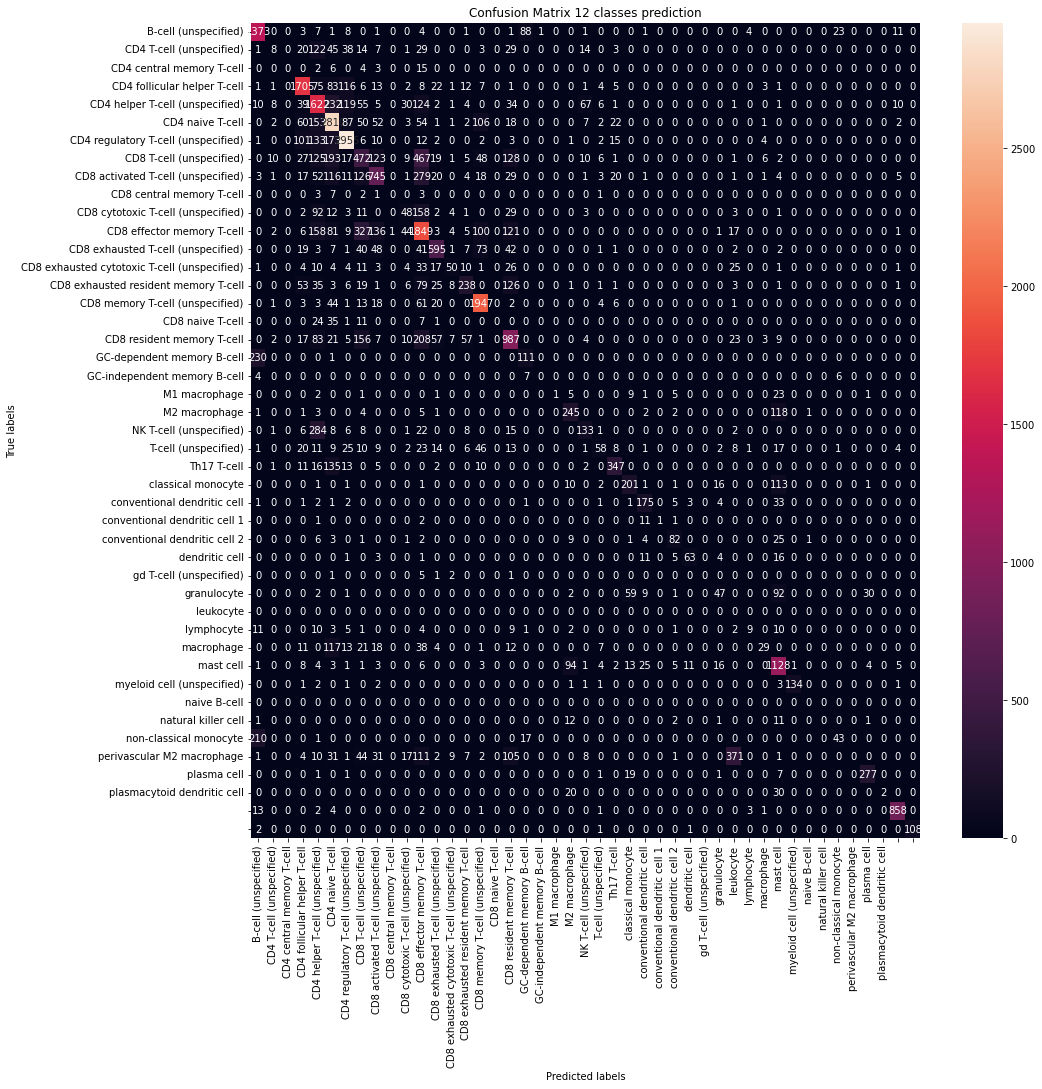

In [ ]:
fig, ax= plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(test)); ax.yaxis.set_ticklabels(np.unique(test));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix 12 classes prediction'); 
plt.show()

## 11.2 T Cell Submodels

### combin df

In [ ]:
df.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3,12classes pred
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3721462_TTAACTCGTGGTCCGT,-0.107822,1.051505,2.883262,2.432532,-0.109245,-0.396519,-0.311899,-0.228958,-0.374381,-0.314901,-0.123083,-0.478353,-0.121983,-0.410996,-0.317847,1.079731,-0.391834,2.974507,-0.301609,-0.098347,-0.279872,-0.395123,-0.191592,-0.141523,2.747149,-0.286109,-0.258971,-0.405238,2.290373,-0.221732,-0.336877,-0.186678,-0.190720,-0.397566,-0.121845,-0.290821,-0.388675,-0.311518,-0.330698,-0.205876,...,-0.303091,1.793907,-0.161401,4.651855,-0.297566,-0.692460,-0.375107,-0.377831,-0.095107,-0.533894,-0.263100,-0.352260,-1.154305,-0.382664,-0.426481,-0.379495,-0.342781,-0.212108,0.508784,-0.968659,-0.167294,-0.175711,-0.158574,-0.314983,-0.196282,-0.375283,-1.761688,-0.432253,0.329213,0.979543,0.790286,0.796424,0.370406,0.648496,1.069004,CD4 regulatory T-cell (unspecified),T-cell,CD4 T-cell,CD4 regulatory T-cell (unspecified),T-cell
ERS3566166_TTAGGACGTATCGCAT,-0.063655,1.507653,2.670236,-0.142561,-0.135437,-0.394918,3.389801,-0.269016,2.823940,-0.359724,-0.094244,-0.434981,-0.189475,-0.235168,-0.368243,-0.923308,-0.340171,-0.306440,-0.214260,-0.094144,-0.236329,-0.306553,-0.231763,-0.188861,-0.591062,-0.322846,-0.314922,-0.458404,2.475220,-0.198593,-0.366953,-0.152740,-0.180766,-0.427092,-0.135466,-0.284995,-0.375764,-0.263782,-0.403794,-0.931781,...,-0.210619,0.566931,-0.157472,-0.211639,-0.283868,-0.457814,-0.286747,-0.342757,-0.138169,-0.573991,-0.310218,-0.326078,-1.110088,-0.238186,-0.205472,2.835677,-0.192411,-0.171109,0.858273,2.118469,-0.197778,-0.206334,-0.164395,-0.345497,-0.283872,-0.360782,-0.247293,0.725249,-0.654162,-0.337532,-0.868864,0.054169,0.341223,-1.366824,-1.693424,CD8 exhausted cytotoxic T-cell (unspecified),T-cell,CD8 T-cell,CD8 exhausted cytotoxic T-cell (unspecified),T-cell
GSM4143657_GTATTCTGTGGCGAAT,-0.113647,0.480302,-0.515310,-0.505588,-0.108071,1.590379,-0.313657,-0.220113,-0.364669,2.120046,6.166434,1.260205,-0.260681,-0.442320,-0.305378,0.980242,-0.375075,-0.338135,-0.378109,-0.098390,-0.273910,-0.412770,-0.195258,-0.143248,-0.767891,2.455667,-0.260026,-0.404972,1.378897,-0.238459,-0.356384,-0.180861,-0.196920,-0.402247,-0.125187,-0.321445,1.539020,-0.322930,-0.362763,0.687239,...,-0.327391,0.134323,-0.162440,-0.213711,-0.451615,-0.799243,-0.395797,-0.404153,-0.150954,-0.551123,-0.260729,-0.372876,-0.166995,-0.382728,-0.475363,-0.420067,-0.360509,-0.235100,-0.072508,0.625717,-0.157375,-0.179278,-0.167442,-0.312845,-0.214009,-0.357135,0.161567,0.077252,-0.491519,0.435404,0.563995,0.375063,1.105832,0.026785,0.233371,CD4 helper T-cell (unspecified),T-cell,CD4 T-cell,CD4 helper T-cell (unspecified),T-cell
GSM3511757_TTGACTTCAAACAACA,-0.117449,-0.672047,-0.491876,-0.484852,-0.100217,-0.398654,-0.333986,-0.231560,-0.375638,-0.296662,-0.124381,-0.493961,-0.168745,-0.457732,-0.306684,1.827102,-0.403985,-0.350837,-0.330297,-0.108919,-0.304182,-0.401522,-0.176835,-0.128035,-0.753513,-0.281455,-0.258681,-0.395121,-0.404980,-0.216367,-0.334333,-0.191253,-0.192640,-0.383314,-0.128038,3.274703,-0.399176,-0.309047,-0.330898,-0.375920,...,-0.305871,0.030387,-0.178059,-0.212737,-0.253249,0.964312,2.300342,-0.369430,-0.109067,3.033242,-0.252673,-0.293199,0.298238,-0.394649,-0.472961,-0.401968,-0.380347,-0.215548,0.436071,-0.975147,-0.162729,-0.181099,-0.155006,-0.311501,-0.193034,2.493191,1.230001,0.532403,0.197154,0.532417,0.726922,1.634403,-1.353829,0.354251,-0.382876,CD8 memor

In [ ]:
df_pred = pd.concat([df_cd4, df_cd8, df_other, df_bcells, df_dendritic, df_macro, df_mono, df_rest])
df_pred = df_pred.reindex(df.index)
df_pred.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3,12classes pred,type2_pred,pred
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3721462_TTAACTCGTGGTCCGT,-0.107822,1.051505,2.883262,2.432532,-0.109245,-0.396519,-0.311899,-0.228958,-0.374381,-0.314901,-0.123083,-0.478353,-0.121983,-0.410996,-0.317847,1.079731,-0.391834,2.974507,-0.301609,-0.098347,-0.279872,-0.395123,-0.191592,-0.141523,2.747149,-0.286109,-0.258971,-0.405238,2.290373,-0.221732,-0.336877,-0.186678,-0.190720,-0.397566,-0.121845,-0.290821,-0.388675,-0.311518,-0.330698,-0.205876,...,-0.161401,4.651855,-0.297566,-0.692460,-0.375107,-0.377831,-0.095107,-0.533894,-0.263100,-0.352260,-1.154305,-0.382664,-0.426481,-0.379495,-0.342781,-0.212108,0.508784,-0.968659,-0.167294,-0.175711,-0.158574,-0.314983,-0.196282,-0.375283,-1.761688,-0.432253,0.329213,0.979543,0.790286,0.796424,0.370406,0.648496,1.069004,CD4 regulatory T-cell (unspecified),T-cell,CD4 T-cell,CD4 regulatory T-cell (unspecified),T-cell,CD4 T-cell,CD4 regulatory T-cell (unspecified)
ERS3566166_TTAGGACGTATCGCAT,-0.063655,1.507653,2.670236,-0.142561,-0.135437,-0.394918,3.389801,-0.269016,2.823940,-0.359724,-0.094244,-0.434981,-0.189475,-0.235168,-0.368243,-0.923308,-0.340171,-0.306440,-0.214260,-0.094144,-0.236329,-0.306553,-0.231763,-0.188861,-0.591062,-0.322846,-0.314922,-0.458404,2.475220,-0.198593,-0.366953,-0.152740,-0.180766,-0.427092,-0.135466,-0.284995,-0.375764,-0.263782,-0.403794,-0.931781,...,-0.157472,-0.211639,-0.283868,-0.457814,-0.286747,-0.342757,-0.138169,-0.573991,-0.310218,-0.326078,-1.110088,-0.238186,-0.205472,2.835677,-0.192411,-0.171109,0.858273,2.118469,-0.197778,-0.206334,-0.164395,-0.345497,-0.283872,-0.360782,-0.247293,0.725249,-0.654162,-0.337532,-0.868864,0.054169,0.341223,-1.366824,-1.693424,CD8 exhausted cytotoxic T-cell (unspecified),T-cell,CD8 T-cell,CD8 exhausted cytotoxic T-cell (unspecified),T-cell,CD8 T-cell,CD8 exhausted cytotoxic T-cell (unspecified)
GSM4143657_GTATTCTGTGGCGAAT,-0.113647,0.480302,-0.515310,-0.505588,-0.108071,1.590379,-0.313657,-0.220113,-0.364669,2.120046,6.166434,1.260205,-0.260681,-0.442320,-0.305378,0.980242,-0.375075,-0.338135,-0.378109,-0.098390,-0.273910,-0.412770,-0.195258,-0.143248,-0.767891,2.455667,-0.260026,-0.404972,1.378897,-0.238459,-0.356384,-0.180861,-0.196920,-0.402247,-0.125187,-0.321445,1.539020,-0.322930,-0.362763,0.687239,...,-0.162440,-0.213711,-0.451615,-0.799243,-0.395797,-0.404153,-0.150954,-0.551123,-0.260729,-0.372876,-0.166995,-0.382728,-0.475363,-0.420067,-0.360509,-0.235100,-0.072508,0.625717,-0.157375,-0.179278,-0.167442,-0.312845,-0.214009,-0.357135,0.161567,0.077252,-0.491519,0.435404,0.563995,0.375063,1.105832,0.026785,0.233371,CD4 helper T-cell (unspecified),T-cell,CD4 T-cell,CD4 helper T-cell (unspecified),T-cell,CD4 T-cell,CD4 helper T-cell (unspecified)
GSM3511757_TTGACTTCAAACAACA,-0.117449,-0.672047,-0.491876,-0.484852,-0.100217,-0.398654,-0.333986,-0.231560,-0.375638,-0.296662,-0.124381,-0.493961,-0.168745,-0.457732,-0.306684,1.827102,-0.403985,-0.350837,-0.330297,-0.108919,-0.304182,-0.401522,-0.176835,-0.128035,-0.753513,-0.281455,-0.258681,-0.395121,-0.404980,-0.216367,-0.334333,-0.191253,-0.192640,-0.383314,-0.128038,3.274703,-0.399176,-0.309047,-0.330898,-0.375920,...,-0.178059,-0.212737,-0.253249,0.964312,2.300342,-0.369430,-0.109067,3.033242,-0.252673,-0.293199,0.298238,-0.394649,-0.472961,-0.401968,-0.380347,-0.215548,0.436071,-0.975147,-0.162729,-0.181099,-0.155006,-0.311501,-0.193034,2.493191,1.230001,0.532403

In [ ]:
df_pred['pred'].isnull().values.any()

False

### evaluate predictions

In [ ]:
test = df_pred['cell_state']
pred = df_pred['pred']

In [ ]:
pd.DataFrame(pred).to_csv('prediction_subset30_unbalanced_hierarchical_submodels.csv', index=False)

In [ ]:
# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(test, pred) * 100, 2 )
f1_lr = round(metrics.f1_score(test, pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(test, pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 weighted of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  64.73
F1 weighted of logistic regression model :  62.72
F1 macro of logistic regression model :  41.84


In [ ]:
report = classification_report(test, pred)
print(report)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                              precision    recall  f1-score   support

                        B-cell (unspecified)       0.74      0.90      0.81      1528
                    CD4 T-cell (unspecified)       0.21      0.02      0.04       334
                   CD4 central memory T-cell       0.00      0.00      0.00        30
                CD4 follicular helper T-cell       0.77      0.78      0.78      2067
             CD4 helper T-cell (unspecified)       0.54      0.65      0.59      2371
                            CD4 naive T-cell       0.67      0.81      0.73      3433
         CD4 regulatory T-cell (unspecified)       0.86      0.84      0.85      3420
                    CD8 T-cell (unspecified)       0.32      0.31      0.32      1670
          CD8 activated T-cell (unspecified)       0.58      0.51      0.54      1458
                   CD8 central memory T-cell       0.00      0.00      0.00        17
          CD8 cytotoxic T-cell (unspecified)       0.

In [ ]:
cm = confusion_matrix(test, pred)
cm

array([[1373,    0,    0, ...,    0,   11,    0],
       [   1,    8,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    2,    0,    0],
       [  13,    0,    0, ...,    0,  858,    0],
       [   2,    0,    0, ...,    0,    0,  108]])

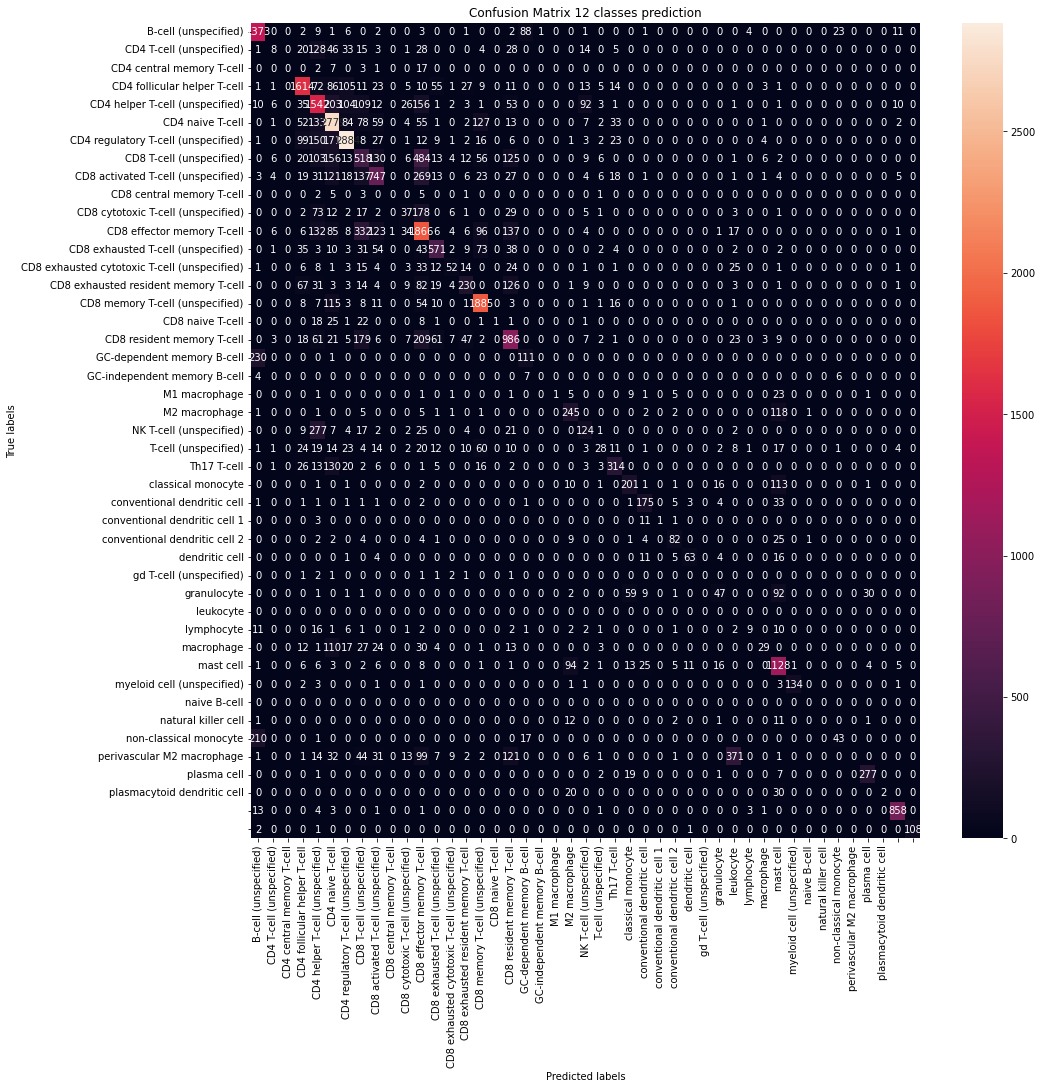

In [ ]:
fig, ax= plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(test)); ax.yaxis.set_ticklabels(np.unique(test));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix 12 classes prediction'); 
plt.show()